In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3BlbnRvdGhhbC9EZXNrdG9wL3dlYmlzdGVfYmF6YWFyL3Bvc3RzL2Jsb2dfcG9zdHM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Caskroom/miniforge/base/envs/playground_env/lib/python3.13/importlib/_bootstrap.py": 1739801221.6717634, "/opt/homebrew/Caskroom/miniforge/base/envs/playground_env/lib/python3.13/importlib/_bootstrap_external.py": 1739801221.6786256, "/opt/homebrew/Caskroom/miniforge/base/envs/playground_env/lib/python3.13/zipimport.py": 1739801219.6869073, "/opt/homebrew/Caskroom/miniforge/base/envs/playground_env/lib/python3.13/codecs.py": 1739801219.2255523, "/opt/homebrew/Caskroom/miniforge/base/envs/playground_env/lib/python3.13/encodings/aliases.py": 1739801220.317547, "/opt/homebrew/Caskroom/miniforge/base/envs/playground_env/lib/python3.13/encodings/__init__.py": 1739801220.3130875, "/opt/homebrew/Caskroom/miniforge/base/envs/playground_env/lib/python3.13/encodings/utf_8.py": 1739801220.9869747, "/opt/homebrew/Caskroom/miniforge/base/envs/playground_env/lib/python3.13/abc.py": 1739801219.1274445, "/opt/homebrew/Caskroom/miniforge/base/envs/playground_env/lib/python3.13/io.py": 1

In [2]:
#| code-fold: true
#| code-summary: Show supplementary code
%load_ext watermark

from pathlib import Path

import os
import numpyro

numpyro.set_host_device_count(os.cpu_count())

from IPython.display import Image

from itertools import product
from functools import partial

from tqdm import tqdm
from joblib import Parallel, delayed

from jax import vmap

from typing import List, Tuple, Any, Callable, Dict
from numpy.typing import ArrayLike

from matplotlib.axes import Axes
import matplotlib as mpl
import matplotlib.pyplot as plt

SMALL_FONT_SIZE = 12
MEDIUM_FONT_SIZE = 15
BIGGER_FONT_SIZE = 18

SINGLE_STATE = ["florida"]

# hail alley
MULTIPLE_STATES = [
    "texas",
    "oklahoma",
    "kansas",
    "nebraska",
    "colorado",
    "missouri",
    "iowa",
    # medium states
    "louisiana",
    "mississippi",
    "alabama",
    "florida",
    # dry states
    "california",
    "new mexico",
    "arizona",
]

LOWER_CUT_OFF_YEAR = 1999
UPPER_CUT_OFF_YEAR = 2024

SELECTED_ANALYSIS_STATES = SINGLE_STATE

FLOAT_PRECISION = 2
DEGREES_PRECISION = 1e-2

TIME_COLUMN = "begin_date_time"

CONTINUOUS_MODELLING_COLUMNS = [
    "year",
    "month",
    "hour",
    "begin_lat",
    "begin_lon",
    "state",
    "countyfp",
    "magnitude",
]

COUNT_MODELLING_COLUMNS = [
    "year",
    "month",
    "hour",
    "state",
    "countyfp",
]

NUMBER_ITERATIONS = 100
NUMBER_PARTICLES = 1

CONTINUOUS_TARGET = "magnitude"
COUNT_TARGET = "number_events"

LAT_COVARIATES = "begin_lat"
LON_COVARIATES = "begin_lon"

YEAR_COVARIATES = "year"
MONTH_COVARIATE = "month"
HOUR_COVARIATE = "hour"

COUNTIES_INDEX = "countyfp"
STATE_INDEX = "state"

CRITICAL_VALUE_CONTINUOUS_TARGET = 1.77
CRITICAL_VALUE_COUNT_TARGET = 5
CRITICAL_QUANTILE = 0.95

COLORMAP_NAME = "Blues"
COLORMAP = mpl.colormaps[COLORMAP_NAME].resampled(5)

DATA_PATH = Path("local_data")
RESULTS_PATH = Path("results")
GIFS_PATH = Path(RESULTS_PATH, "gif_images")
IMAGES_PATH = Path(RESULTS_PATH, "images")

plt.rc('font', size=SMALL_FONT_SIZE) 
plt.rc('axes', titlesize=MEDIUM_FONT_SIZE)
plt.rc('axes', labelsize=SMALL_FONT_SIZE)
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    
plt.rc('figure', titlesize=BIGGER_FONT_SIZE)
plt.rc('figure', dpi=100)

In [3]:
#| code-fold: true
#| code-summary: Show supplementary code
import numpy as np

import pandas as pd
import geopandas as gpd

from pyextremes import get_extremes


def pad_dataset(
    df: pd.DataFrame,
    categorical_columns: List[str],
    fill_value: float = 0.0,
) -> pd.DataFrame:
    """Pad a dataset over all the dimensions defined by indexing columns filling the missing
    entries with fill_value.
    """
    new_index = list([df[column].unique() for column in categorical_columns])
    new_index = product(*new_index)
    df = df.set_index(keys=categorical_columns)
    df = df.reindex(new_index).fillna(fill_value).reset_index()
    return df


def make_grid(polygon: Any, edge_size: float) -> gpd.GeoSeries:
    """Create a grid of the size of polygon made of squares of size edge_size"""
    bounds = polygon.bounds
    x_coords = np.arange(bounds[0] + edge_size / 2, bounds[2], edge_size)
    y_coords = np.arange(bounds[1] + edge_size / 2, bounds[3], edge_size)
    combinations = np.array(list(product(x_coords, y_coords)))
    squares = gpd.points_from_xy(combinations[:, 0], combinations[:, 1]).buffer(
        edge_size / 1, cap_style=3
    )
    return gpd.GeoSeries(squares[squares.intersects(polygon)])


def generate_grid_df(
    geometries_df: gpd.GeoDataFrame,
    edge_size: float,
    state: List[str] = SELECTED_ANALYSIS_STATES,
) -> gpd.GeoDataFrame:
    """Generate a geod-dataframe made of giddified polygons"""
    state_geometries_df = geometries_df[
        geometries_df[STATE_INDEX].str.lower().isin([s for s in state])
    ].copy()
    grid_df = []
    list_counties_fp = state_geometries_df[COUNTIES_INDEX].values
    list_states_fp = state_geometries_df[STATE_INDEX].values
    list_geometries = state_geometries_df["geometry"].values
    for countyfp, state, geometry in zip(
        list_counties_fp, list_states_fp, list_geometries
    ):

        generated_grid = make_grid(geometry, edge_size=edge_size)
        grid_df.append(
            pd.DataFrame(
                {
                    COUNTIES_INDEX: countyfp,
                    STATE_INDEX: state,
                    "geometry": generated_grid,
                }
            )
        )
    grid_df = gpd.GeoDataFrame(pd.concat(grid_df))
    grid_df["begin_lat"] = grid_df["geometry"].centroid.y.round(FLOAT_PRECISION)
    grid_df["begin_lon"] = grid_df["geometry"].centroid.x.round(FLOAT_PRECISION)
    return grid_df


def split_dataset(
    df: pd.DataFrame,
    ordering_columns: List[str],
    split_fraction: float = 0.33,
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Split dataset in two portions"""
    df = df.sort_values(ordering_columns)
    cut_off = int(len(df) * split_fraction)
    return df[:-cut_off].copy(), df[-cut_off:].copy()


def perform_dithering(
    magnitudes: ArrayLike,
    cap: float = 0.5,
    dithering_coefficient: float = 0.147,
    dithering_bias: float = 0.0279,
) -> ArrayLike:
    """Perform dithering following the procedure in
    https://www.columbia.edu/~mkt14/publications/MWR-final-hailsize.pdf
    """
    dithering_amounts = dithering_bias + dithering_coefficient * magnitudes
    dithering_amounts = np.clip(dithering_amounts, a_min=0.0, a_max=cap)
    dithering_noise = np.random.uniform(-dithering_amounts, dithering_amounts)
    dithered_magnitudes = np.clip(magnitudes + dithering_noise, 0, None)
    return dithered_magnitudes


def make_time_series_continuous(
    series: pd.Series, start: str, end: str, frequency: str
) -> pd.Series:
    """Make a time series continuous and pad the missing values with zeros"""
    new_index = pd.date_range(start=start, end=end, freq=frequency)
    return series.reindex(new_index, fill_value=0)


def downscale_coordinates(
    values: ArrayLike, precision: int, degree_resolution: float
) -> ArrayLike:
    """Downscale latitude and longitude coordinate to a certain degree resolution."""
    return np.round(degree_resolution * np.round(values / degree_resolution), precision)


def create_covariates_df(
    geometries_df: gpd.GeoDataFrame,
    edge_size: float,
    state: List[str],
    months: List[int],
    hours: List[int],
    years: List[int],
) -> gpd.GeoDataFrame:
    """Create a dataframe of covariates for inference"""
    covariates_df = []
    grid_df = generate_grid_df(
        geometries_df=geometries_df,
        edge_size=edge_size,
        state=state,
    )
    for year, month, hour in list(product(years, months, hours)):

        timed_grid_df = grid_df.copy()
        timed_grid_df["year"] = year
        timed_grid_df["month"] = month
        timed_grid_df["hour"] = hour

        covariates_df.append(timed_grid_df)

    covariates_df = pd.concat(covariates_df)
    covariates_df = gpd.GeoDataFrame(covariates_df)
    return covariates_df


def create_maxima_dataset(
    df: pd.DataFrame, grouping_columns: List[str], value_column: str
) -> pd.DataFrame:
    """Create the dataset for fitting gen-extreme data"""
    maxima_df = df[grouping_columns + [value_column]].copy()
    maxima_df = maxima_df.groupby(grouping_columns)[value_column].max().reset_index()
    return maxima_df


def get_extremes_in_blocks(
    maxima_df: pd.Series,
    county_fp: str,
    state_fp,
    start: str,
    end: str,
) -> pd.DataFrame:
    """Extract the extreme values using either Point of Threshold or Block Maxima"""
    maxima_df = make_time_series_continuous(
        series=maxima_df,
        start=start,
        end=end,
        frequency="1h",
    )
    extremes = get_extremes(
        ts=maxima_df,
        method="BM",
    )
    extremes = extremes.reset_index()
    extremes[COUNTIES_INDEX] = county_fp
    extremes[STATE_INDEX] = state_fp
    return extremes


def create_eva_dataset(
    modelling_df: pd.DataFrame, geometries_df: gpd.GeoDataFrame
) -> pd.DataFrame:
    """Create a dataset used for Extreme Value Analysis"""
    maxima_data = create_maxima_dataset(
        df=modelling_df,
        grouping_columns=[TIME_COLUMN, STATE_INDEX, COUNTIES_INDEX],
        value_column=CONTINUOUS_TARGET,
    )
    grouped = maxima_data.groupby([COUNTIES_INDEX, STATE_INDEX])

    list_df = [group.set_index(TIME_COLUMN)[CONTINUOUS_TARGET] for _, group in grouped]
    list_category_names = grouped.groups.keys()

    partialized_get_extremes_df = partial(
        get_extremes_in_blocks,
        start=maxima_data[TIME_COLUMN].min(),
        end=maxima_data[TIME_COLUMN].max(),
    )
    eva_df = Parallel(n_jobs=-1)(
        delayed(partialized_get_extremes_df)(data, county_fp, state_fp)
        for data, (county_fp, state_fp) in zip(list_df, list_category_names)
    )
    eva_df: pd.DataFrame = pd.concat(eva_df)
    eva_df[CONTINUOUS_TARGET] = eva_df[CONTINUOUS_TARGET].replace(
        to_replace=0,
        value=eva_df[CONTINUOUS_TARGET].mean(),
    )
    eva_df = eva_df.rename({"date-time": TIME_COLUMN}, axis=1)
    eva_df = pd.merge(
        eva_df,
        geometries_df[[COUNTIES_INDEX, STATE_INDEX, "geometry"]].drop_duplicates(),
        on=[COUNTIES_INDEX, STATE_INDEX],
        how="inner",
    )
    eva_df = pd.merge(
        eva_df,
        modelling_df[["county", COUNTIES_INDEX, STATE_INDEX]].drop_duplicates(),
        on=[COUNTIES_INDEX, STATE_INDEX],
        how="inner",
    )
    return eva_df


def create_continuous_dataset(
    modelling_df: pd.DataFrame, geometries_df: gpd.GeoDataFrame
) -> pd.DataFrame:
    """Create a dataset for continuous modelling"""
    continuous_modelling_df = modelling_df[CONTINUOUS_MODELLING_COLUMNS + ["begin_date_time"]].copy()
    continuous_modelling_df = (
        continuous_modelling_df.groupby(
            list(continuous_modelling_df.drop(CONTINUOUS_TARGET, axis=1))
        )[CONTINUOUS_TARGET]
        .max()
        .reset_index()
        .drop("begin_date_time", axis=1)
    )
    continuous_modelling_df = pd.merge(
        continuous_modelling_df,
        geometries_df[[COUNTIES_INDEX, STATE_INDEX, "geometry"]],
        on=[COUNTIES_INDEX, STATE_INDEX],
        how="inner",
    )
    return continuous_modelling_df


def create_count_dataset(
    modelling_df: pd.DataFrame, geometries_df: gpd.GeoDataFrame
) -> gpd.GeoDataFrame:
    """Create a dataset for count modelling"""
    count_modelling_df = modelling_df[
        [
            "county",
            "begin_date_time",
            "year",
            "month",
            "hour",
            "state",
            COUNTIES_INDEX,
        ]
    ].copy()

    count_modelling_df = (
        count_modelling_df.groupby(
            [
                "county",
                "begin_date_time",
                "year",
                "month",
                "hour",
                "state",
                COUNTIES_INDEX,
            ]
        )
        .size()
        .reset_index()
        .rename({0: COUNT_TARGET}, axis=1)
        .groupby(COUNT_MODELLING_COLUMNS)[COUNT_TARGET]
        .max()
        .reset_index()
    )
    count_modelling_df = pad_dataset(
        df=count_modelling_df,
        categorical_columns=COUNT_MODELLING_COLUMNS,
    )
    count_modelling_df = pd.merge(
        count_modelling_df,
        geometries_df[[COUNTIES_INDEX, STATE_INDEX, "geometry"]],
        on=[COUNTIES_INDEX, STATE_INDEX],
        how="inner",
    )
    return count_modelling_df


def create_all_datasets(
    modelling_df: pd.DataFrame,
    geometries_df: gpd.GeoDataFrame,
    state: List[str] = SELECTED_ANALYSIS_STATES,
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """Create all dataset required for the notebook"""
    state_modelling_df = modelling_df[modelling_df["state"].isin(state)].copy()
    continuous_state_modelling_df = create_continuous_dataset(
        modelling_df=state_modelling_df,
        geometries_df=geometries_df,
    )
    count_state_modelling_df = create_count_dataset(
        modelling_df=state_modelling_df,
        geometries_df=geometries_df,
    )
    eva_state_modelling_df = create_eva_dataset(
        modelling_df=state_modelling_df,
        geometries_df=geometries_df,
    )

    return (
        continuous_state_modelling_df,
        count_state_modelling_df,
        eva_state_modelling_df,
    )

In [4]:
modelling_df = pd.read_parquet(Path(DATA_PATH, "modelling_df.parquet"))
modelling_df["state"] = modelling_df["state"].apply(
    lambda x: [i.lower() for i in x.split(" ")]
)
modelling_df["state"] = modelling_df["state"].apply(lambda x: "_".join(x))
modelling_df = modelling_df.rename({"yearly": "year"}, axis=1)

modelling_df["begin_lat"] = modelling_df["begin_lat"].values.round(FLOAT_PRECISION)
modelling_df["begin_lon"] = modelling_df["begin_lon"].values.round(FLOAT_PRECISION)
modelling_df["magnitude"] = perform_dithering(
    magnitudes=modelling_df["magnitude"].values
)
modelling_df

,county,begin_lat,begin_lon,begin_date_time,countyfp,statefp,countyfp_nozero,magnitude,state,monthly,daily,year,month,hour,time_index
0,abbeville,34.09,-82.60,2009-04-10 19:00:00,001,45,1,1.491996,south_carolina,2009-04-06,2009-04-10,2009,4,19,116353
1,abbeville,34.09,-82.59,2010-03-28 19:00:00,001,45,1,0.933026,south_carolina,2010-03-02,2010-03-28,2010,3,19,124801
2,abbeville,34.09,-82.59,2010-04-25 01:00:00,001,45,1,2.002821,south_carolina,2010-04-01,2010-04-25,2010,4,1,125455
3,abbeville,34.10,-82.62,1998-06-09 16:00:00,001,45,1,1.143295,south_carolina,1998-06-03,1998-06-09,1998,6,16,21358
4,abbeville,34.10,-82.60,1997-04-22 14:00:00,001,45,1,0.810593,south_carolina,1997-04-09,1997-04-22,1997,4,14,11444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310393,ziebach,45.40,-101.86,2013-07-23 18:00:00,137,46,137,1.811021,south_dakota,2013-07-14,2013-07-23,2013,7,18,153912
310394,ziebach,45.42,-101.81,2019-09-29 22:00:00,137,46,137,0.906396,south_dakota,2019-09-11,2019-09-29,2019,9,22,208132
310395,ziebach,45.47,-101.65,2003-07-03 22:00:00,137,46,137,0.675737,south_dakota,2003-06-07,2003-07-03,2003,7,22,65764
310396,ziebach,45.47,-101.65,2008-07-18 18:00:00,137,46,137,1.624055,south_dakota,2008-07-10,2008-07-18,2008,7,18,109968


In [5]:
modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310398 entries, 0 to 310397
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   county           310398 non-null  object        
 1   begin_lat        310398 non-null  float64       
 2   begin_lon        310398 non-null  float64       
 3   begin_date_time  310398 non-null  datetime64[ns]
 4   countyfp         310398 non-null  object        
 5   statefp          310398 non-null  object        
 6   countyfp_nozero  310398 non-null  object        
 7   magnitude        310398 non-null  float64       
 8   state            310398 non-null  object        
 9   monthly          310398 non-null  datetime64[ns]
 10  daily            310398 non-null  datetime64[ns]
 11  year             310398 non-null  int32         
 12  month            310398 non-null  int32         
 13  hour             310398 non-null  int32         
 14  time_index       310

In [6]:
geometries_df = gpd.read_file(filename=Path(DATA_PATH, "us_counties_df.geojson"))
geometries_df = geometries_df.rename({"state_name": "state"}, axis=1)
geometries_df["state"] = geometries_df["state"].apply(
    lambda x: [i.lower() for i in x.split(" ")]
)
geometries_df["state"] = geometries_df["state"].apply(lambda x: "_".join(x))
geometries_df

,geo_point_2d,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state,countyfp_nozero,geometry
0,"{ ""lon"": -96.615073673300003, ""lat"": 28.439109...",48,057,01383814,48057,Calhoun,Calhoun County,TX,06,H1,...,38920,None,A,1312707005,1361884774,+28.4417191,-096.5795739,texas,57,"POLYGON ((-96.87329 28.62291, -96.87148 28.624..."
1,"{ ""lon"": -86.190418669300001, ""lat"": 36.751316...",21,003,00516848,21003,Allen,Allen County,KY,06,H1,...,14540,None,A,891838779,19482100,+36.7507703,-086.1924580,kentucky,3,"POLYGON ((-86.2958 36.85107, -86.29347 36.8526..."
2,"{ ""lon"": -97.721324086699994, ""lat"": 48.369456...",38,099,01034214,38099,Walsh,Walsh County,ND,06,H1,...,None,None,A,3319346396,32181391,+48.3769789,-097.7222304,north_dakota,99,"POLYGON ((-98.29185 48.36969, -98.29211 48.369..."
3,"{ ""lon"": -84.649203742099999, ""lat"": 36.135024...",47,129,01639778,47129,Morgan,Morgan County,TN,06,H1,...,28940,None,A,1352439675,823018,+36.1386970,-084.6392616,tennessee,129,"POLYGON ((-84.79101 36.05853, -84.79184 36.059..."
4,"{ ""lon"": -105.367471778, ""lat"": 38.10867790150...",08,027,00198129,08027,Custer,Custer County,CO,06,H1,...,None,None,A,1913031921,3364150,+38.1019955,-105.3735123,colorado,27,"POLYGON ((-105.7969 38.26505, -105.78341 38.26..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,"{ ""lon"": -89.823002441400007, ""lat"": 31.569641...",28,065,00695756,28065,Jefferson Davis,Jefferson Davis County,MS,06,H1,...,None,None,A,1057871313,1791496,+31.5648075,-089.8270863,mississippi,65,"POLYGON ((-89.97537 31.59155, -89.97535 31.592..."
3229,"{ ""lon"": -89.414372033899994, ""lat"": 35.197080...",47,047,01639742,47047,Fayette,Fayette County,TN,06,H1,...,32820,None,A,1825359642,3774635,+35.1969933,-089.4138027,tennessee,47,"POLYGON ((-89.63773 35.17934, -89.63768 35.181..."
3230,"{ ""lon"": -97.891896839799998, ""lat"": 42.636781...",31,107,00835875,31107,Knox,Knox County,NE,06,H1,...,None,None,A,2870854403,81011709,+42.6344045,-097.8913492,nebraska,107,"POLYGON ((-97.60303 42.85796, -97.60294 42.857..."
3231,"{ ""lon"": -123.098321728, ""lat"": 45.56009084080...",41,067,01155137,41067,Washington,Washington County,OR,06,H1,...,38900,None,A,1875859540,6114246,+45.5535419,-123.0976146,oregon,67,"POLYGON ((-123.20926 45.43371, -123.20976 45.4..."


In [7]:
geometries_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   geo_point_2d     3233 non-null   object  
 1   statefp          3233 non-null   object  
 2   countyfp         3233 non-null   object  
 3   countyns         3233 non-null   object  
 4   geoid            3233 non-null   object  
 5   name             3233 non-null   object  
 6   namelsad         3233 non-null   object  
 7   stusab           3233 non-null   object  
 8   lsad             3233 non-null   object  
 9   classfp          3233 non-null   object  
 10  mtfcc            3233 non-null   object  
 11  csafp            1255 non-null   object  
 12  cbsafp           1915 non-null   object  
 13  metdivfp         110 non-null    object  
 14  funcstat         3233 non-null   object  
 15  aland            3233 non-null   int64   
 16  awater           3233 non-null   i

In [8]:
continuous_state_modelling_df, count_state_modelling_df, eva_state_modelling_df = (
    create_all_datasets(
        modelling_df=modelling_df[
            (modelling_df["year"] >= LOWER_CUT_OFF_YEAR)
            & (modelling_df["year"] <= UPPER_CUT_OFF_YEAR)
        ],
        geometries_df=geometries_df,
        state=SELECTED_ANALYSIS_STATES,
    )
)

In [9]:
eva_state_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   begin_date_time  1768 non-null   datetime64[ns]
 1   magnitude        1768 non-null   float64       
 2   countyfp         1768 non-null   object        
 3   state            1768 non-null   object        
 4   geometry         1768 non-null   geometry      
 5   county           1768 non-null   object        
dtypes: datetime64[ns](1), float64(1), geometry(1), object(3)
memory usage: 83.0+ KB


In [10]:
continuous_state_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   year       3813 non-null   int32   
 1   month      3813 non-null   int32   
 2   hour       3813 non-null   int32   
 3   begin_lat  3813 non-null   float64 
 4   begin_lon  3813 non-null   float64 
 5   state      3813 non-null   object  
 6   countyfp   3813 non-null   object  
 7   magnitude  3813 non-null   float64 
 8   geometry   3813 non-null   geometry
dtypes: float64(3), geometry(1), int32(3), object(2)
memory usage: 223.5+ KB


In [11]:
count_state_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501696 entries, 0 to 501695
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   year           501696 non-null  int32   
 1   month          501696 non-null  int32   
 2   hour           501696 non-null  int32   
 3   state          501696 non-null  object  
 4   countyfp       501696 non-null  object  
 5   number_events  501696 non-null  float64 
 6   geometry       501696 non-null  geometry
dtypes: float64(1), geometry(1), int32(3), object(2)
memory usage: 21.1+ MB


In [12]:
#| code-fold: true
#| code-summary: Show supplementary code
import gif

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes


def plot_distribution_hail(
    continuous_state_modelling_df: pd.DataFrame,
    x: str,
    ax: plt.Axes,
    states: List[str] = SELECTED_ANALYSIS_STATES,
    **kwargs: Any,
) -> plt.Axes:
    """Plot the distribution of hail magnitude"""
    title_states = "\n".join([state.capitalize() for state in states])
    sns.histplot(data=continuous_state_modelling_df, x=x, ax=ax, **kwargs)
    ax.grid(alpha=0.5)
    ax.set_title(f"{title_states}\nHourly Hail Events")
    return ax


def plot_hail_distribution_with_tails(
    magnitude_events: ArrayLike, state: str, threshold=CRITICAL_VALUE_CONTINUOUS_TARGET
) -> Tuple[plt.Figure, plt.Axes, plt.Axes]:
    """Plot a distribution of hail events magnitude with a focus on the tail."""
    fig, ax = plt.subplots(1, 1, figsize=[8, 5])
    sub_ax = inset_axes(
        ax,
        width=2,
        height=2,
        loc="center right",
    )
    sns.histplot(
        data=magnitude_events,
        bins=8,
        ax=ax,
        alpha=1,
    )
    sns.histplot(
        data=magnitude_events[magnitude_events > threshold],
        bins=8,
        ax=sub_ax,
        alpha=1,
    )
    ax.set_title(f"Distribution Hail Events\n{state.capitalize()}")
    ax.set_xlabel("Hail Size")

    sub_ax.set_title(f"Extreme Hail Events\n{state.capitalize()}")
    sub_ax.set_xlabel("Hail Size")

    ax.axvline(
        1.77,
        linestyle="--",
        c="r",
        linewidth=5,
        label="Critical Value",
    )
    ax.grid(alpha=0.5, zorder=0)
    ax.legend()
    return fig, ax, sub_ax


def plot_hail_events_on_map(
    geometries_df: gpd.GeoDataFrame,
    state_modelling_df: pd.DataFrame,
    selected_state: str = SELECTED_ANALYSIS_STATES,
    threshold: float = CRITICAL_VALUE_CONTINUOUS_TARGET,
    extreme_threshold: float = 2.5,
    extreme_events_size: float = 25,
    **scatter_kwargs: Any,
):
    """Visualize the hail events on a map with highlight of above-threshold event"""
    fig, axs = plt.subplots(1, 2, figsize=(10, 10), sharey=True, sharex=True)

    (
        geometries_df[geometries_df[STATE_INDEX] == selected_state].boundary.plot(
            ax=axs[0], color="k", linewidth=0.5
        )
    )
    (
        geometries_df[geometries_df[STATE_INDEX] == selected_state].boundary.plot(
            ax=axs[1], color="k", linewidth=0.5
        )
    )
    axs[0].scatter(
        state_modelling_df["begin_lon"].values,
        state_modelling_df["begin_lat"].values,
        c=state_modelling_df[CONTINUOUS_TARGET].values,
        vmin=0,
        vmax=4.5,
        cmap=COLORMAP_NAME,
        **scatter_kwargs,
    )
    axs[1].scatter(
        state_modelling_df[
            (state_modelling_df[CONTINUOUS_TARGET] > threshold)
            & (state_modelling_df[CONTINUOUS_TARGET] < extreme_threshold)
        ]["begin_lon"].values,
        state_modelling_df[
            (state_modelling_df[CONTINUOUS_TARGET] > threshold)
            & (state_modelling_df[CONTINUOUS_TARGET] < extreme_threshold)
        ]["begin_lat"].values,
        c=state_modelling_df[
            (state_modelling_df[CONTINUOUS_TARGET] > threshold)
            & (state_modelling_df[CONTINUOUS_TARGET] < extreme_threshold)
        ][CONTINUOUS_TARGET].values,
        vmin=0,
        vmax=5,
        cmap=COLORMAP_NAME,
        **scatter_kwargs,
    )
    axs[1].scatter(
        state_modelling_df[
            (state_modelling_df[CONTINUOUS_TARGET] >= extreme_threshold)
        ]["begin_lon"].values,
        state_modelling_df[
            (state_modelling_df[CONTINUOUS_TARGET] >= extreme_threshold)
        ]["begin_lat"].values,
        c="r",
        s=extreme_events_size,
    )

    for ax in axs:

        ax.grid(alpha=0.5)

    axs[0].set_title(f"Hail Events\n{selected_state.capitalize()} Counties")
    axs[1].set_title(f"Extreme Hail Events\n{selected_state.capitalize()} Counties")
    axs[0].set_xlabel("Longitude")
    axs[1].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")
    axs[1].set_title(f"Extreme Hail Events\n{selected_state.capitalize()} Counties")
    return fig, axs


def plot_quantile_hail_time(
    time_column: str,
    y: str,
    modelling_df: pd.DataFrame,
    ax: plt.Axes,
    quantile: float,
    states: List[str] = SELECTED_ANALYSIS_STATES,
    **kwargs: Any,
) -> plt.Axes:
    """Plot the average hail attribute over a certain categorical columns"""
    title_states = "\n".join([state.capitalize() for state in states])
    sns.lineplot(
        data=modelling_df,
        x=time_column,
        y=y,
        ax=ax,
        estimator=partial(np.percentile, q=quantile),
        n_boot=100,
        **kwargs,
    )
    ax.grid(alpha=0.5)
    ax.set_ylim(0, modelling_df[y].max())
    ax.set_ylabel(y.capitalize())
    ax.set_xlabel(time_column.capitalize())
    ax.set_title(f"{title_states}\nQuantile {quantile} {y.capitalize()}")
    return ax


def plot_quantile_hail_geometry(
    modelling_df: pd.DataFrame,
    color_column: str,
    max_value: float,
    ax: Axes,
    quantile: float = 0.5,
    states: List[str] = SELECTED_ANALYSIS_STATES,
) -> Axes:
    """Plot quantile of hail attribute over geometries"""
    title_states = "\n".join([state.capitalize() for state in states])
    (
        gpd.GeoDataFrame(
            modelling_df.groupby("geometry")[color_column]
            .quantile(quantile)
            .reset_index()
        ).plot(
            color_column,
            cmap=COLORMAP_NAME,
            ax=ax,
            legend=True,
            vmin=0.0,
            vmax=max_value,
            legend_kwds={"shrink": 0.7},
        )
    )
    ax.grid(alpha=0.5)
    ax.set_title(
        f"{title_states}\nQuantile {quantile * 100} {color_column.capitalize()}"
    )
    ax.set_ylabel("Longitude")
    ax.set_xlabel("Latitude")
    return ax


@gif.frame
def plot_comparison_quantile_hail_geometry(
    quantile: float,
    continuous_state_modelling_df: gpd.GeoDataFrame,
    count_state_modelling_df: gpd.GeoDataFrame,
    states: List[str] = SELECTED_ANALYSIS_STATES,
) -> None:
    """Compare hail magnitude and hail quantity over geometries"""
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    for ax, df, color_column in zip(
        axs,
        [continuous_state_modelling_df, count_state_modelling_df],
        [CONTINUOUS_TARGET, COUNT_TARGET],
    ):

        ax = plot_quantile_hail_geometry(
            modelling_df=df,
            color_column=color_column,
            ax=ax,
            quantile=quantile,
            max_value=df[color_column].max(),
            states=states,
        )

    plt.tight_layout()


@gif.frame
def plot_comparison_quantile_hail_time(
    y: str,
    modelling_df: gpd.GeoDataFrame,
    quantile: float,
    color: Any,
    states: List[str] = SELECTED_ANALYSIS_STATES,
    **kwargs: Any,
) -> None:
    """Compare average hail attribute over hour and month"""
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    for ax, time_indicator in zip(axs, ["hour", "month", "year"]):

        ax = plot_quantile_hail_time(
            modelling_df=modelling_df,
            time_column=time_indicator,
            y=y,
            ax=ax,
            quantile=quantile,
            states=states,
            color=color,
            **kwargs,
        )

    plt.tight_layout()

In [13]:
fig, axs = plot_hail_events_on_map(
    geometries_df=geometries_df,
    state_modelling_df=continuous_state_modelling_df,
    selected_state=SELECTED_ANALYSIS_STATES[0],
    threshold=1.7,
    s=1.5,
    extreme_events_size=10,
)
fig.subplots_adjust(top=1.33)
plt.tight_layout()
plt.savefig(Path(IMAGES_PATH, "hail_events_comparison_total.png"))
plt.close("all")

In [14]:
partialized_plot_comparison_quantile_hail_geometry = partial(
    plot_comparison_quantile_hail_geometry,
    continuous_state_modelling_df=continuous_state_modelling_df,
    count_state_modelling_df=count_state_modelling_df[
        count_state_modelling_df["number_events"] > 0
    ],
    states=SELECTED_ANALYSIS_STATES,
)
quantiles = [.25, .75, .95, .99]
frames = [partialized_plot_comparison_quantile_hail_geometry(quantile=quantile) for index, quantile in enumerate(quantiles)]
gif.save(frames, Path(GIFS_PATH, 'spatial_map_quantiles.gif').as_posix(), duration=1000)

In [15]:
partialized_plot_comparison_quantile_hail_time = partial(
    plot_comparison_quantile_hail_time,
    y=COUNT_TARGET,
    modelling_df=count_state_modelling_df[
        count_state_modelling_df["number_events"] > 0
    ],
    states=SELECTED_ANALYSIS_STATES,
    linewidth=3,
    solid_capstyle='round'
)
quantiles = [25, 75, 95, 99]
frames = [partialized_plot_comparison_quantile_hail_time(quantile=quantile, color=COLORMAP(index + 1)) for index, quantile in enumerate(quantiles)]
gif.save(frames, Path(GIFS_PATH, 'temporal_quantiles.gif').as_posix(), duration=1000)

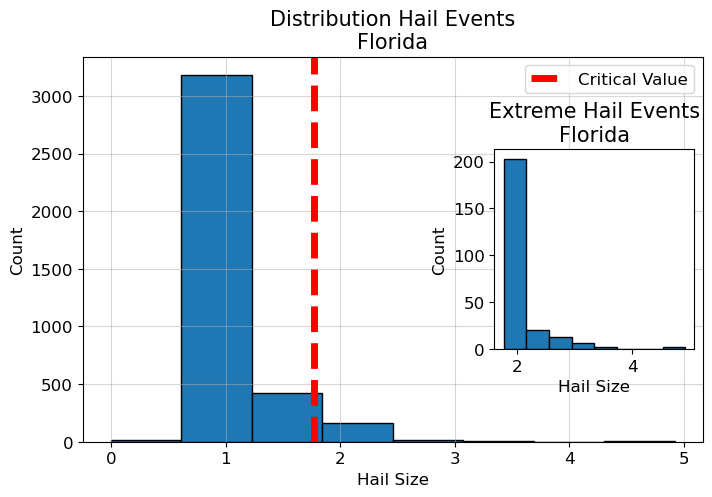

In [16]:
fig, ax, sub_ax = plot_hail_distribution_with_tails(
    magnitude_events=continuous_state_modelling_df[CONTINUOUS_TARGET].values,
    state=SELECTED_ANALYSIS_STATES[0],
)
plt.savefig(Path(IMAGES_PATH, "events_distribution.png"))

In [17]:
#| code-fold: true
#| code-summary: Show supplementary code
from scipy.stats import rankdata
from scipy.stats import genextreme

from pyextremes import get_extremes
from pyextremes import EVA


def compute_empirical_return_periods(hail_events_extremes: ArrayLike) -> ArrayLike:
    """Compute the return period empirically from the data"""
    ranks = rankdata(a=-hail_events_extremes)
    excedance = ranks / (len(hail_events_extremes) + 1)
    periods = 1 / excedance
    return periods


def compute_mle_return_periods_scipy(
    hail_events_extremes: pd.Series, max_years: int = 150, min_years: float = 2
) -> List[float]:
    """Estimate the parameters of a genextreme distribution and compute the return periods using
    the genextreme parameters estimated using scipy.
    """
    c, loc, scale = genextreme.fit(hail_events_extremes)
    periods = []
    for year in np.arange(min_years, max_years):

        periods.append(genextreme.ppf(1 - 1 / year, c, loc=loc, scale=scale))

    return periods


def compute_mle_return_periods_pyextremes(
    hail_events_extremes: pd.Series, max_years: int = 150
) -> Tuple[ArrayLike, Any]:
    """Estimate the parameters of a genextreme distribution and compute the return periods using
    the genextreme parameters estimated using pyextremes.
    """
    model = EVA.from_extremes(extremes=hail_events_extremes, method="BM")
    model.fit_model(distribution_kwargs={"floc": 0})
    periods, _, _ = model.get_return_value(np.arange(2, max_years))
    return periods, model


def plot_fit_extreme_values(
    ax: Axes,
    category: str,
    model_names: List[str],
    models: Dict[str, Any],
    critical_magnitude: float,
    critical_period: int,
) -> Axes:
    """Visualize how the estimated return function fit the empirical return values."""
    ax.scatter(
        models["empirical"][category]["period"],
        models["empirical"][category]["magnitude"],
        s=80,
        facecolors="none",
        edgecolors="k",
        label="Empirical Values",
    )
    ax.axhline(critical_magnitude, c="r", linestyle=":", label="Critical Limit")
    ax.axvline(critical_period, c="r", linestyle="-.", label=f"{critical_period} Years")

    for model_name in model_names:

        ax.plot(
            models[model_name][category]["period"],
            models[model_name][category]["magnitude"],
            label=f"{model_name}",
        )

    ax.set_title("\n".join(category.split("_")))
    ax.grid(alpha=0.5)
    ax.set_ylabel("Hail Size")
    ax.set_xlabel("Return Period")
    return ax

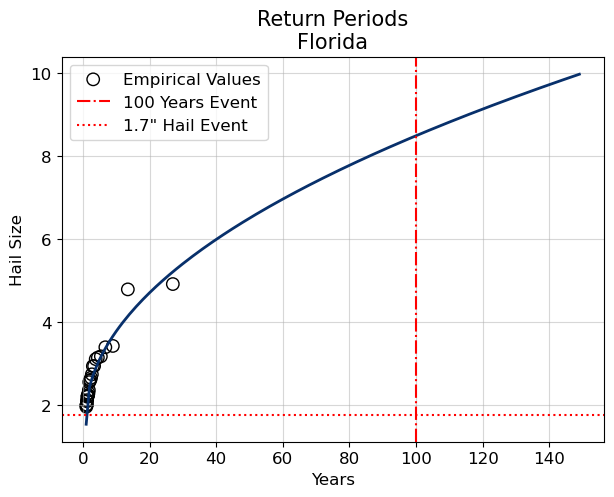

In [18]:
aggregated_eva_state_modelling = (
    eva_state_modelling_df.groupby(eva_state_modelling_df["begin_date_time"].dt.year)[
        CONTINUOUS_TARGET
    ]
    .max()
    .reset_index()
)
returns = compute_empirical_return_periods(
    aggregated_eva_state_modelling[CONTINUOUS_TARGET].values
)

plt.scatter(
    returns,
    aggregated_eva_state_modelling[CONTINUOUS_TARGET].values,
    s=80,
    facecolors="none",
    edgecolors="k",
    label="Empirical Values",
)
plt.plot(
    np.arange(1, 150),
    compute_mle_return_periods_scipy(
        aggregated_eva_state_modelling[CONTINUOUS_TARGET],
        max_years=150,
        min_years=1,
    ),
    c=COLORMAP(5),
    linewidth=2,
)
plt.grid(alpha=0.5)
plt.title(f"Return Periods\n{SINGLE_STATE[0].capitalize()}")
plt.ylabel("Hail Size")
plt.xlabel("Years")
plt.axvline(100, linestyle="-.", c="r", label="100 Years Event")
plt.axhline(
    CRITICAL_VALUE_CONTINUOUS_TARGET, linestyle=":", c="r", label='1.7" Hail Event'
)
plt.legend()
plt.show()

In [19]:
#| code-fold: true
#| code-summary: Show supplementary code
models = {
    "empirical": {},
    "MLE_scipy": {},
    "MLE_pyextreme": {},
}
county_names = eva_state_modelling_df["county"].unique()
for county in tqdm(county_names):

    hail_events_extremes = eva_state_modelling_df[
        eva_state_modelling_df["county"] == county
    ][CONTINUOUS_TARGET].values
    time_index = eva_state_modelling_df[eva_state_modelling_df["county"] == county][
        TIME_COLUMN
    ].values

    return_value, model = compute_mle_return_periods_pyextremes(
        hail_events_extremes=pd.Series(data=hail_events_extremes, index=time_index),
    )

    models["empirical"][county] = {
        "period": compute_empirical_return_periods(
            hail_events_extremes=hail_events_extremes,
        ),
        "magnitude": hail_events_extremes,
    }

    models["MLE_scipy"][county] = {
        "period": np.arange(2, 150),
        "magnitude": compute_mle_return_periods_scipy(
            hail_events_extremes=hail_events_extremes,
        ),
    }
    models["MLE_pyextreme"][county] = {
        "period": np.arange(2, 150),
        "magnitude": return_value,
        "model": model,
    }

  0%|          | 0/68 [00:00<?, ?it/s]

  4%|▍         | 3/68 [00:00<00:02, 25.17it/s]

 10%|█         | 7/68 [00:00<00:02, 29.15it/s]

 15%|█▍        | 10/68 [00:00<00:01, 29.24it/s]

 19%|█▉        | 13/68 [00:00<00:01, 28.81it/s]

 24%|██▎       | 16/68 [00:00<00:02, 24.82it/s]

 28%|██▊       | 19/68 [00:00<00:02, 22.79it/s]

 32%|███▏      | 22/68 [00:00<00:02, 22.76it/s]

 37%|███▋      | 25/68 [00:01<00:01, 23.27it/s]

 41%|████      | 28/68 [00:01<00:01, 24.32it/s]

 46%|████▌     | 31/68 [00:01<00:01, 24.92it/s]

 50%|█████     | 34/68 [00:01<00:01, 24.76it/s]

 56%|█████▌    | 38/68 [00:01<00:01, 26.89it/s]

 62%|██████▏   | 42/68 [00:01<00:00, 28.76it/s]

 66%|██████▌   | 45/68 [00:01<00:00, 28.23it/s]

 72%|███████▏  | 49/68 [00:01<00:00, 29.36it/s]

 76%|███████▋  | 52/68 [00:01<00:00, 27.21it/s]

 82%|████████▏ | 56/68 [00:02<00:00, 29.23it/s]

 87%|████████▋ | 59/68 [00:02<00:00, 24.40it/s]

 91%|█████████ | 62/68 [00:02<00:00, 25.57it/s]

 97%|█████████▋| 66/68 [00:02<00:00, 27.46it/s]

100%|██████████| 68/68 [00:02<00:00, 26.15it/s]

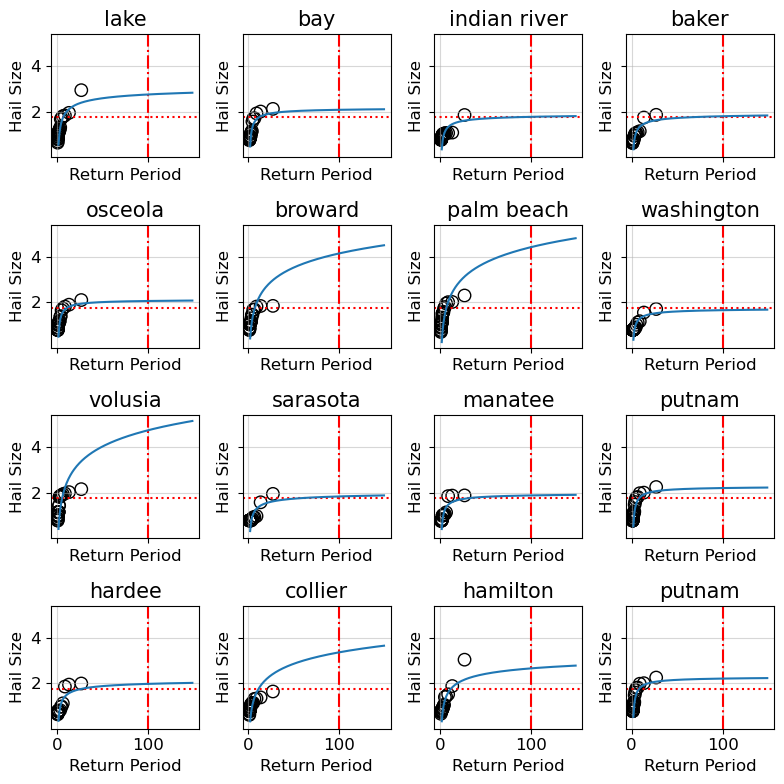

In [20]:
selected_counties = np.random.choice(county_names, 16)

fig, axs = plt.subplots(4, 4, figsize=(8, 8), sharex=True, sharey=True)
for ax, county in zip(axs.flatten(), selected_counties):

    ax = plot_fit_extreme_values(
        ax=ax,
        category=county,
        model_names=["MLE_pyextreme"],
        models=models,
        critical_magnitude=1.77,
        critical_period=100,
    )

plt.tight_layout()

In [21]:
#| code-fold: true
#| code-summary: Show supplementary code
from scipy.stats import iqr

from sklearn.preprocessing import SplineTransformer, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

from jax import numpy as jnp
from jax import random

from numpyro.infer.reparam import LocScaleReparam

from numpyro.distributions import (
    Normal,
    AsymmetricLaplaceQuantile,
    HalfNormal,
    HalfCauchy,
    Distribution,
    Laplace,
)
from numpyro.infer import MCMC, NUTS, Predictive, SVI, Trace_ELBO, RenyiELBO
from numpyro.infer.svi import SVIRunResult
from numpyro.infer.autoguide import (
    AutoDAIS,
    AutoNormal,
    AutoLowRankMultivariateNormal,
    AutoMultivariateNormal,
)

RNG_KEY = random.key(seed=666)

def sample_using_mcmc(
    rng_key: ArrayLike,
    model: Callable,
    model_kwargs: Dict[str, Any],
    MCMC_kwargs: Dict[str, Any],
) -> MCMC:
    """Sample from the model using MCMC"""
    rng_key, sub_rng_key = random.split(rng_key)
    kernel = NUTS(model=model)
    mcmc = MCMC(kernel, progress_bar=True, **MCMC_kwargs)
    mcmc.run(sub_rng_key, **model_kwargs)
    mcmc.print_summary()
    return mcmc


def sample_using_svi(
    rng_key: ArrayLike,
    model: Callable,
    autoguide: Any,
    model_kwargs: Dict[str, Any],
    guide_kwargs: Dict[str, Any],
    optimizer_kwargs: Dict[str, Any],
    num_steps: int,
    elbo_tracer: Any = Trace_ELBO,
    num_particles: int = 2
) -> Tuple[SVIRunResult, AutoDAIS]:
    """Sample from the model using variational inference"""
    rng_key, sub_rng_key = random.split(rng_key)
    guide = autoguide(model=model, **guide_kwargs)
    optimizer = numpyro.optim.ClippedAdam(**optimizer_kwargs)
    svi = SVI(model, guide, optimizer, loss=elbo_tracer(num_particles=num_particles))
    svi_result = svi.run(sub_rng_key, num_steps, **model_kwargs)

    fig, ax = plt.subplots()
    ax.plot(svi_result.losses)
    ax.set_title("ELBO loss")
    ax.grid(alpha=0.5)
    plt.show()

    return svi_result, guide


def sample_posterior_predictive_mcmc(
    rng_key: ArrayLike,
    model: Callable,
    posterior_samples: Dict[str, Any],
    model_kwargs: Dict[str, Any],
) -> ArrayLike:
    """Sample from the posterior using MCMC  posterior samples"""
    rng_key, sub_rng_key = random.split(rng_key)
    predictive = Predictive(model, posterior_samples=posterior_samples)
    posterior_predictive = predictive(rng_key=sub_rng_key, **model_kwargs)
    return posterior_predictive


def sample_posterior_predictive_svi(
    rng_key: ArrayLike,
    model: Callable,
    guide: AutoDAIS,
    covariates_hat: Dict[str, ArrayLike],
    svi_result: SVIRunResult,
    num_samples: int,
    model_kwargs: Dict[str, Any],
    return_sites: List[str] = None,
    target: ArrayLike = None,
) -> ArrayLike:
    """Sample from the posterior using SVI inferred parameters"""
    model_kwargs = {key: value for key, value in model_kwargs.items()}
    model_kwargs["target"] = target
    model_kwargs["covariates"] = covariates_hat
    predictive = Predictive(
        model=model,
        guide=guide,
        params=svi_result.params,
        num_samples=num_samples,
        exclude_deterministic=False,
        return_sites=return_sites,
    )
    rng_key, sub_rng_key = random.split(rng_key)
    posterior_predictive = predictive(rng_key=sub_rng_key, **model_kwargs)
    return posterior_predictive


def transform_fitting_covariates(
    covariates: Dict[str, ArrayLike],
    transformers: Dict[str, Any],
) -> Tuple[Dict[str, ArrayLike], Dict[str, Any]]:
    """Fit transformers and transform covariates"""
    transformed_covariates = {}
    for covariate_name, covariate_array in covariates.items():

        transformers[covariate_name].fit(covariate_array)
        transformed_covariates[covariate_name] = transformers[covariate_name].transform(
            covariate_array
        )

    return transformed_covariates, transformers


def transform_estimation_covariates(
    covariates: Dict[str, ArrayLike],
    transformers: Dict[str, Any],
) -> Dict[str, ArrayLike]:
    """Transform covariates using fitted transformers"""
    transformed_covariates = {}
    for covariate_name, covariate_array in covariates.items():

        transformed_covariates[covariate_name] = transformers[covariate_name].transform(
            covariate_array
        )

    return transformed_covariates


def jaxify_array_dictionary(
    array_dictionary: Dict[str, ArrayLike],
) -> Dict[str, ArrayLike]:
    """Turn arrays in a dictionary into JAX arrays"""
    jaxified_array_dictionary = {}
    for key, value in array_dictionary.items():

        jaxified_array_dictionary[key] = jnp.array(value)

    return jaxified_array_dictionary


def prepare_modelling_data(
    covariates: Dict[str, ArrayLike],
    covariates_hat: Dict[str, ArrayLike],
    transformers: Dict[str, Pipeline],
    target: ArrayLike,
) -> Tuple[Dict[str, Pipeline], Dict[str, ArrayLike], Dict[str, ArrayLike], ArrayLike]:
    transformed_covariates, transformers = transform_fitting_covariates(
        covariates=covariates,
        transformers=transformers,
    )
    transformed_covariates_hat = transform_estimation_covariates(
        covariates=covariates_hat,
        transformers=transformers,
    )
    transformed_covariates = jaxify_array_dictionary(
        array_dictionary=transformed_covariates,
    )
    transformed_covariates_hat = jaxify_array_dictionary(
        array_dictionary=transformed_covariates_hat,
    )
    target = jnp.array(target)

    return transformers, transformed_covariates, transformed_covariates_hat, target

def generate_temporal_components(
    posterior: Dict[str, ArrayLike],
    transformers: Dict[str, Pipeline],
    years: ArrayLike,
    suffix: str = "",
    parameter_transformer: Callable = None
) -> Dict[str, ArrayLike]:
    """Generate the temporal components"""
    mapped_dot = vmap(jnp.dot, in_axes=(None, 0))
    covariates = {
        "year_covariates": (years.reshape(-1, 1)),
        "month_covariates": (np.arange(1, 13).reshape(-1, 1)),
        "hour_covariates": (np.arange(24).reshape(-1, 1)),
    }

    covariates = transform_estimation_covariates(
        covariates=covariates, transformers=transformers
    )

    year_component = mapped_dot(
        covariates["year_covariates"], posterior[f"beta_year{suffix}"]
    )
    month_component = mapped_dot(
        covariates["month_covariates"], posterior[f"beta_month{suffix}"]
    )
    hour_component = mapped_dot(
        covariates["hour_covariates"], posterior[f"beta_hour{suffix}"]
    )

    posterior_components = {
        "year_component": year_component,
        "month_component": month_component,
        "hour_component": hour_component,
    }

    if parameter_transformer is not None:

        posterior_components = {
            key: parameter_transformer(value) for key, value in posterior_components.items()
        }

    return posterior_components

def visualize_geo_regression(
    covariates_hat_df: gpd.GeoDataFrame, posterior: Dict[str, ArrayLike], parameter: str, parameter_transformer: Callable = None
) -> Tuple[plt.Figure, Axes]:
    """Visualize the result from the regression on a geodataframe."""
    parameter_value = posterior[parameter]
    if parameter_transformer is not None:
        parameter_value = parameter_transformer(parameter_value)

    covariates_hat_df["2.5%"] = np.percentile(
        parameter_value,
        q=2.5,
        axis=0,
    )
    covariates_hat_df["Median"] = np.percentile(
        parameter_value,
        q=50,
        axis=0,
    )
    covariates_hat_df["97.5%"] = np.percentile(
        parameter_value,
        q=97.5,
        axis=0,
    )
    fig, axs = plt.subplots(1, 3, figsize=(15, 10))
    for ax, column in zip(axs, ["2.5%", "Median", "97.5%"]):

        covariates_hat_df.plot(
            column,
            ax=ax,
            cmap=COLORMAP_NAME,
            legend=True,
            legend_kwds={"shrink": 0.3},
            vmin=np.percentile(parameter_value, q=1),
            vmax=np.percentile(parameter_value, q=99),
        )
        ax.grid(alpha=0.5)
        ax.set_title(column)
        ax.set_ylabel("Longitude")
        ax.set_xlabel("Latitude")

    return fig, axs


def visualize_county_regression(
    modelling_df: pd.DataFrame,
    covariates_hat_df: gpd.GeoDataFrame,
    posterior: Dict[str, ArrayLike],
    parameter: str,
    target: str,
) -> Tuple[plt.Figure, Axes]:
    """Visualize the regression at county level"""
    samples_df = pd.DataFrame(posterior[parameter].T)
    samples_df[COUNTIES_INDEX] = covariates_hat_df[COUNTIES_INDEX].values
    rows = 4
    random_counties = np.random.choice(
        samples_df[COUNTIES_INDEX].unique(), rows**2, replace=False
    )
    fig, axs = plt.subplots(rows, rows, figsize=(10, 10))
    for county, ax in zip(random_counties, axs.flatten()):

        county_target = modelling_df[modelling_df[COUNTIES_INDEX] == county][
            target
        ].values
        county_samples = (
            samples_df[samples_df[COUNTIES_INDEX] == county]
            .drop([COUNTIES_INDEX], axis=1)
            .values.flatten()
        )
        sns.histplot(
            data=county_target,
            element="step",
            fill=False,
            stat="density",
            ax=ax,
            color=COLORMAP(5),
        )

        ax.axvline(np.quantile(county_target, CRITICAL_QUANTILE), c="r", linestyle="--")
        ax.axvspan(
            np.quantile(county_samples, 0.025),
            np.quantile(county_samples, 0.975),
            alpha=0.5,
            color="red",
        )
        ax.grid(alpha=0.5)
        ax.set_ylim(0, None)
    plt.tight_layout()
    return fig, axs


def visualize_temporal_components(temporal_components: Dict[str, ArrayLike]) -> Tuple[plt.Figure, Axes]:
    """Visualize the various temporal components"""
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    for ax, component in zip(axs.flatten(), ["year_component", "month_component", "hour_component"]):
        ax.plot(
            np.percentile(
                a=temporal_components[component],
                q=50,
                axis=0
            ),
            c=COLORMAP(5)
        )
        ax.fill_between(
            np.arange(temporal_components[component].shape[1]),
            np.percentile(
                a=temporal_components[component],
                q=2.5,
                axis=0
            ),
            np.percentile(
                a=temporal_components[component],
                q=97.5,
                axis=0
            ),
            color=COLORMAP(1),
            alpha=0.5
        )
        ax.set_title(" ".join(component.split("_")))
        ax.grid(alpha=0.5)
        ax.set_xlabel(component.split("_")[0])
        ax.set_ylabel("Component Contribution")

    plt.tight_layout()
    return fig, axs


def create_tensor_product_spline(first_spline, second_spline):
    return np.tensordot(first_spline, second_spline, axes=0)

In [22]:
#| code-fold: true
#| code-summary: Show supplementary code
def create_estimation_covariates_quantile_regression(
    months: List[int],
    hours: List[int],
    years: List[int],
    geometries_df: gpd.GeoDataFrame,
    edge_size: float,
    states: List[str],
) -> Tuple[gpd.GeoDataFrame, Dict[str, ArrayLike]]:
    """Create the covariates for estimation"""
    quantile_regression_covariates_hat_df = create_covariates_df(
        geometries_df=geometries_df,
        edge_size=edge_size,
        state=states,
        months=months,
        hours=hours,
        years=years,
    )
    quantile_regression_covariates_hat = {
        "latitude_covariates": (
            quantile_regression_covariates_hat_df[LAT_COVARIATES].values.reshape(-1, 1)
        ),
        "longitude_covariates": (
            quantile_regression_covariates_hat_df[LON_COVARIATES].values.reshape(-1, 1)
        ),
        "year_covariates": (
            quantile_regression_covariates_hat_df[YEAR_COVARIATES].values.reshape(-1, 1)
        ),
        "month_covariates": (
            quantile_regression_covariates_hat_df[MONTH_COVARIATE].values.reshape(-1, 1)
        ),
        "hour_covariates": (
            quantile_regression_covariates_hat_df[HOUR_COVARIATE].values.reshape(-1, 1)
        ),
        "counties_index": (
            quantile_regression_covariates_hat_df[COUNTIES_INDEX].values.reshape(-1, 1)
        ),
    }
    return quantile_regression_covariates_hat_df, quantile_regression_covariates_hat

In [23]:
quantile_regression_transformers = {
    "latitude_covariates": Pipeline(
        steps=[
            (
                "spline_transformer",
                SplineTransformer(
                    include_bias=False,
                    extrapolation="periodic",
                    n_knots=20,
                ),
            )
        ]
    ),
    "longitude_covariates": Pipeline(
        steps=[
            (
                "spline_transformer",
                SplineTransformer(
                    include_bias=False,
                    extrapolation="periodic",
                    n_knots=20,
                ),
            )
        ]
    ),
    "year_covariates": Pipeline(
        steps=[
            (
                "ordinal_encoder",
                OrdinalEncoder(
                    dtype="int",
                ),
            ),
            (
                "spline_transformer",
                SplineTransformer(
                    include_bias=False,
                ),
            ),
        ]
    ),
    "month_covariates": Pipeline(
        steps=[
            (
                "spline_transformer",
                SplineTransformer(
                    include_bias=False,
                ),
            )
        ]
    ),
    "hour_covariates": Pipeline(
        steps=[
            (
                "spline_transformer",
                SplineTransformer(
                    include_bias=False,
                ),
            )
        ]
    ),
    "counties_index": OrdinalEncoder(
        dtype="int",
    ),
}
quantile_regression_covariates = {
    "latitude_covariates": (
        continuous_state_modelling_df[LAT_COVARIATES].values.reshape(-1, 1)
    ),
    "longitude_covariates": (
        continuous_state_modelling_df[LON_COVARIATES].values.reshape(-1, 1)
    ),
    "year_covariates": (
        continuous_state_modelling_df[YEAR_COVARIATES].values.reshape(-1, 1)
    ),
    "month_covariates": (
        continuous_state_modelling_df[MONTH_COVARIATE].values.reshape(-1, 1)
    ),
    "hour_covariates": (
        continuous_state_modelling_df[HOUR_COVARIATE].values.reshape(-1, 1)
    ),
    "counties_index": (
        continuous_state_modelling_df[COUNTIES_INDEX].values.reshape(-1, 1)
    ),
}
quantile_regression_target = continuous_state_modelling_df[CONTINUOUS_TARGET].values

quantile_regression_covariates_hat_df, quantile_regression_covariates_hat = (
    create_estimation_covariates_quantile_regression(
        months=[5],
        hours=[17],
        years=[2024],
        geometries_df=geometries_df,
        edge_size=DEGREES_PRECISION,
        states=SELECTED_ANALYSIS_STATES,
    )
)

(
    quantile_regression_transformers,
    quantile_regression_covariates,
    quantile_regression_covariates_hat,
    target,
) = prepare_modelling_data(
    covariates=quantile_regression_covariates,
    covariates_hat=quantile_regression_covariates_hat,
    target=quantile_regression_target,
    transformers=quantile_regression_transformers,
)

quantile_regression_covariates["latitude_longitude_tensor_covariates"] = (
    np.vstack(
        [
            create_tensor_product_spline(
                quantile_regression_covariates["latitude_covariates"][i, :], 
                quantile_regression_covariates["longitude_covariates"][i, :]).flatten() for i in range(quantile_regression_covariates["latitude_covariates"].shape[0]
            )
        ]
    )
)
quantile_regression_covariates_hat["latitude_longitude_tensor_covariates"] = (
    np.vstack(
        [
            create_tensor_product_spline(
                quantile_regression_covariates_hat["latitude_covariates"][i, :], 
                quantile_regression_covariates_hat["longitude_covariates"][i, :]).flatten() for i in range(quantile_regression_covariates_hat["latitude_covariates"].shape[0]
            )
        ]
    )
)

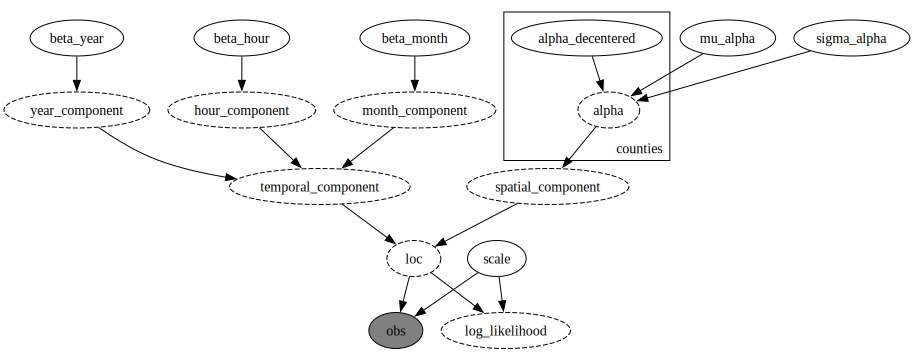

In [24]:
reparam_config = {
    "alpha": LocScaleReparam(0),
}


@numpyro.handlers.reparam(config=reparam_config)
def hierarchical_non_spatial_quantile_regression(
    target: ArrayLike,
    covariates: Dict[str, ArrayLike],
    quantile: float,
    prior_mu_alpha: Distribution,
    prior_sigma_alpha: Distribution,
    prior_scale: Distribution,
    prior_beta_year: Distribution,
    prior_beta_month: Distribution,
    prior_beta_hour: Distribution,
) -> None:
    """Quantile regression model with partially pooled intercept"""
    n_groups = len(np.unique(covariates["counties_index"]))
    counties_index = covariates["counties_index"].flatten()

    mu_alpha = numpyro.sample(
        "mu_alpha",
        prior_mu_alpha,
    )
    sigma_alpha = numpyro.sample(
        "sigma_alpha",
        prior_sigma_alpha,
    )

    with numpyro.plate("counties", n_groups):

        alpha = numpyro.sample(
            "alpha",
            Normal(mu_alpha, sigma_alpha),
        )

    beta_hour = numpyro.sample(
        "beta_hour",
        prior_beta_hour.expand([covariates["hour_covariates"].shape[1]]),
    )
    beta_month = numpyro.sample(
        "beta_month",
        prior_beta_month.expand([covariates["month_covariates"].shape[1]]),
    )
    beta_year = numpyro.sample(
        "beta_year",
        prior_beta_year.expand([covariates["year_covariates"].shape[1]]),
    )
    hour_component = numpyro.deterministic(
        name="hour_component",
        value=jnp.dot(covariates["hour_covariates"], beta_hour),
    )
    month_component = numpyro.deterministic(
        name="month_component",
        value=jnp.dot(covariates["month_covariates"], beta_month),
    )
    year_component = numpyro.deterministic(
        name="year_component",
        value=jnp.dot(covariates["year_covariates"], beta_year),
    )
    temporal_component = numpyro.deterministic(
        name="temporal_component",
        value=year_component + month_component + hour_component,
    )
    spatial_component = numpyro.deterministic(
        name="spatial_component",
        value=alpha[counties_index],
    )
    loc = numpyro.deterministic(
        name="loc", 
        value=jnp.exp(spatial_component + temporal_component)
    )
    scale = numpyro.sample(
        "scale",
        prior_scale,
    )
    obs = numpyro.sample(
        "obs",
        AsymmetricLaplaceQuantile(loc=loc, scale=scale, quantile=quantile),
        obs=target,
    )
    if target is not None:
        numpyro.deterministic(
            "log_likelihood",
            AsymmetricLaplaceQuantile(
                loc=loc, 
                scale=scale, 
                quantile=quantile,
            )
            .log_prob(target)
        )

hierarchical_non_spatial_model_parameters = [
    "mu_alpha",
    "sigma_alpha",
    "beta_hour",
    "beta_month",
    "beta_year",
    "loc",
    "alpha",
    "hour_component",
    "month_component",
    "year_component",
    "temporal_component",
    "spatial_component",
    "scale",
    "obs",
]
hierarchical_non_spatial_model_kwargs = {
    "covariates": quantile_regression_covariates,
    "quantile": CRITICAL_QUANTILE,
    "target": quantile_regression_target,
    "prior_mu_alpha": Normal(loc=0.0, scale=5.0),
    "prior_sigma_alpha": HalfCauchy(scale=2.0),
    "prior_beta_year": Normal(loc=0.0, scale=1),
    "prior_beta_month": Normal(loc=0.0, scale=1),
    "prior_beta_hour": Normal(loc=0.0, scale=1),
    "prior_scale": HalfNormal(scale=1),
}
numpyro.render_model(
    hierarchical_non_spatial_quantile_regression,
    model_kwargs=hierarchical_non_spatial_model_kwargs,
    render_distributions=False,
)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:27,  3.56it/s]

100%|██████████| 100/100 [00:00<00:00, 323.59it/s, init loss: 15671.9941, avg. loss [96-100]: 16196.0732]

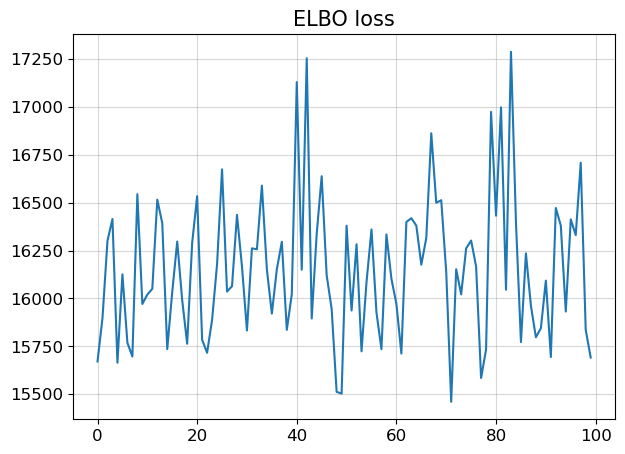

In [25]:
svi_pooled_quantile_regression_parameters, svi_pooled_quantile_regression_guide = (
    sample_using_svi(
        rng_key=RNG_KEY,
        model=hierarchical_non_spatial_quantile_regression,
        model_kwargs=hierarchical_non_spatial_model_kwargs,
        autoguide=AutoMultivariateNormal,
        guide_kwargs={},
        optimizer_kwargs={"step_size": 1e-4, "clip_norm": 5},
        num_steps=NUMBER_ITERATIONS,
        num_particles=NUMBER_PARTICLES,
    )
)

In [26]:
posterior_hierarchical_non_spatial_regression_svi = sample_posterior_predictive_svi(
    rng_key=RNG_KEY,
    covariates_hat=quantile_regression_covariates_hat,
    model_kwargs=hierarchical_non_spatial_model_kwargs,
    model=hierarchical_non_spatial_quantile_regression,
    guide=svi_pooled_quantile_regression_guide,
    svi_result=svi_pooled_quantile_regression_parameters,
    num_samples=2000,
    return_sites=hierarchical_non_spatial_model_parameters,
)

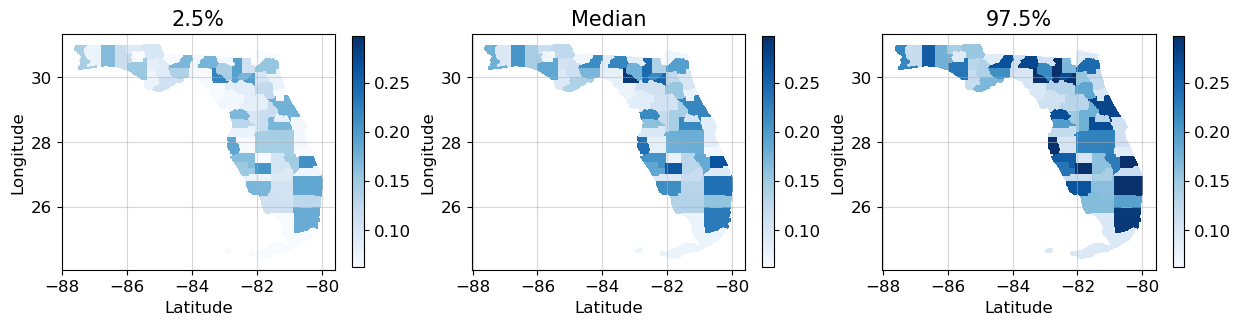

In [27]:
fig, axs = visualize_geo_regression(
    covariates_hat_df=quantile_regression_covariates_hat_df,
    posterior=posterior_hierarchical_non_spatial_regression_svi,
    parameter="spatial_component",
    parameter_transformer=lambda x: jnp.exp(x)

)
plt.show()

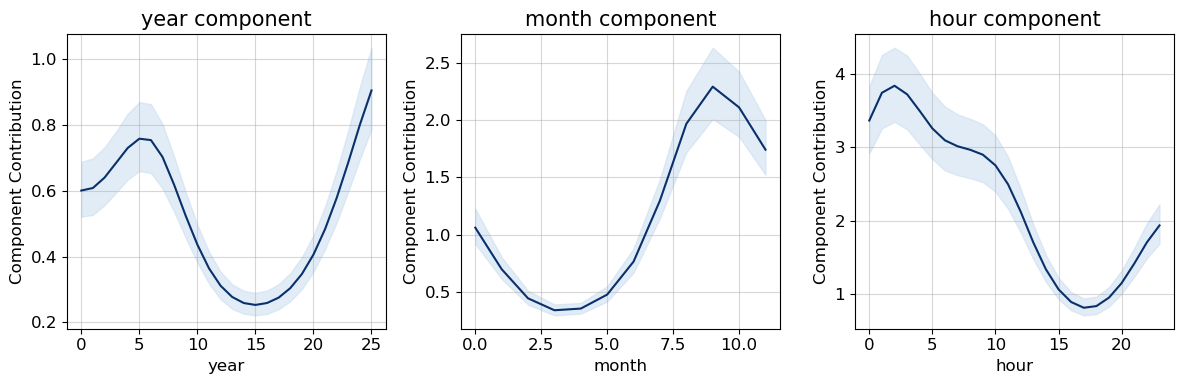

In [28]:
fig, axs = visualize_temporal_components(
    temporal_components=generate_temporal_components(
        posterior=posterior_hierarchical_non_spatial_regression_svi,
        transformers=quantile_regression_transformers,
        years=continuous_state_modelling_df[YEAR_COVARIATES].unique(),
        parameter_transformer=lambda x: jnp.exp(x)
    )
)
plt.show()

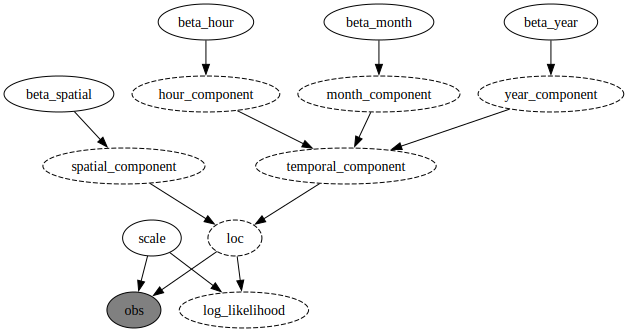

In [29]:
def pooled_quantile_regression(
    target: ArrayLike,
    covariates: Dict[str, ArrayLike],
    quantile: float,
    prior_beta_spatial: Distribution,
    prior_beta_month: Distribution,
    prior_beta_year: Distribution,
    prior_beta_hour: Distribution,
    prior_scale: Distribution,
) -> None:
    """Simple quantile regression model"""
    beta_spatial = numpyro.sample(
        "beta_spatial",
        prior_beta_spatial.expand([covariates["latitude_longitude_tensor_covariates"].shape[1]]),
    )
    beta_hour = numpyro.sample(
        "beta_hour",
        prior_beta_hour.expand([covariates["hour_covariates"].shape[1]]),
    )
    beta_month = numpyro.sample(
        "beta_month",
        prior_beta_month.expand([covariates["month_covariates"].shape[1]]),
    )
    beta_year = numpyro.sample(
        "beta_year",
        prior_beta_year.expand([covariates["year_covariates"].shape[1]]),
    )
    scale = numpyro.sample(
        "scale",
        prior_scale,
    )
    hour_component = numpyro.deterministic(
        name="hour_component",
        value=jnp.dot(covariates["hour_covariates"], beta_hour),
    )
    month_component = numpyro.deterministic(
        name="month_component",
        value=jnp.dot(covariates["month_covariates"], beta_month),
    )
    year_component = numpyro.deterministic(
        name="year_component",
        value=jnp.dot(covariates["year_covariates"], beta_year),
    )
    spatial_component = numpyro.deterministic(
        name="spatial_component",
        value=jnp.dot(covariates["latitude_longitude_tensor_covariates"], beta_spatial),
    )
    temporal_component = numpyro.deterministic(
        name="temporal_component",
        value=year_component + month_component + hour_component,
    )
    loc = numpyro.deterministic(
        name="loc",
        value=jnp.exp(spatial_component + temporal_component),
    )
    obs = numpyro.sample(
        "obs",
        AsymmetricLaplaceQuantile(loc=loc, scale=scale, quantile=quantile),
        obs=target,
    )
    if target is not None:
        numpyro.deterministic(
            "log_likelihood",
            AsymmetricLaplaceQuantile(
                loc=loc, 
                scale=scale, 
                quantile=quantile,
            )
            .log_prob(target)
        )

pooled_quantile_model_parameters = [
    "beta_spatial",
    "beta_hour",
    "beta_month",
    "beta_year",
    "loc",
    "spatial_component",
    "hour_component",
    "month_component",
    "year_component",
    "scale",
    "obs",
]
pooled_quantile_model_kwargs = {
    "covariates": quantile_regression_covariates,
    "quantile": CRITICAL_QUANTILE,
    "target": quantile_regression_target,
    "prior_beta_spatial": Laplace(loc=0.0, scale=5),
    "prior_beta_year": Normal(loc=0.0, scale=1),
    "prior_beta_month": Normal(loc=0.0, scale=1),
    "prior_beta_hour": Normal(loc=0.0, scale=1),
    "prior_scale": HalfNormal(scale=1),
}
numpyro.render_model(
    pooled_quantile_regression,
    model_kwargs=pooled_quantile_model_kwargs,
    render_distributions=False,
    render_params=True,
)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:27,  3.67it/s]

 86%|████████▌ | 86/100 [00:00<00:00, 294.07it/s, init loss: 13984.2441, avg. loss [81-85]: 14533.4922]

100%|██████████| 100/100 [00:00<00:00, 256.42it/s, init loss: 13984.2441, avg. loss [96-100]: 14279.2705]

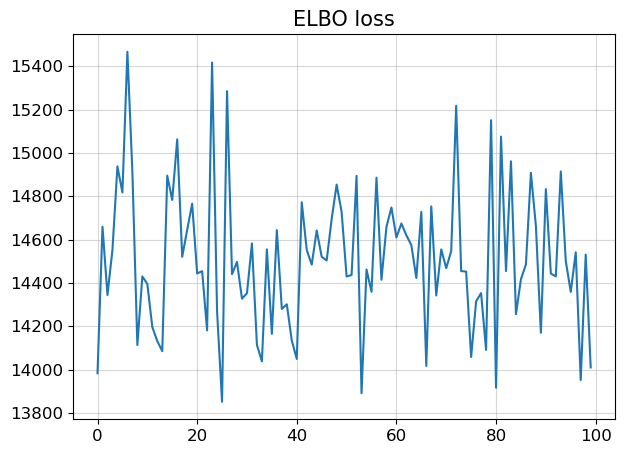

In [30]:
svi_pooled_quantile_regression_parameters, svi_pooled_quantile_regression_guide = (
    sample_using_svi(
        rng_key=RNG_KEY,
        model=pooled_quantile_regression,
        model_kwargs=pooled_quantile_model_kwargs,
        autoguide=AutoMultivariateNormal,
        guide_kwargs={},
        optimizer_kwargs={"step_size": 1e-4, "clip_norm": 5},
        num_steps=NUMBER_ITERATIONS,
        num_particles=NUMBER_PARTICLES,
    )
)

In [31]:
posterior_pooled_quantile_regression_svi = sample_posterior_predictive_svi(
    rng_key=RNG_KEY,
    covariates_hat=quantile_regression_covariates_hat,
    model_kwargs=pooled_quantile_model_kwargs,
    model=pooled_quantile_regression,
    guide=svi_pooled_quantile_regression_guide,
    svi_result=svi_pooled_quantile_regression_parameters,
    num_samples=2000,
    return_sites=pooled_quantile_model_parameters,
)

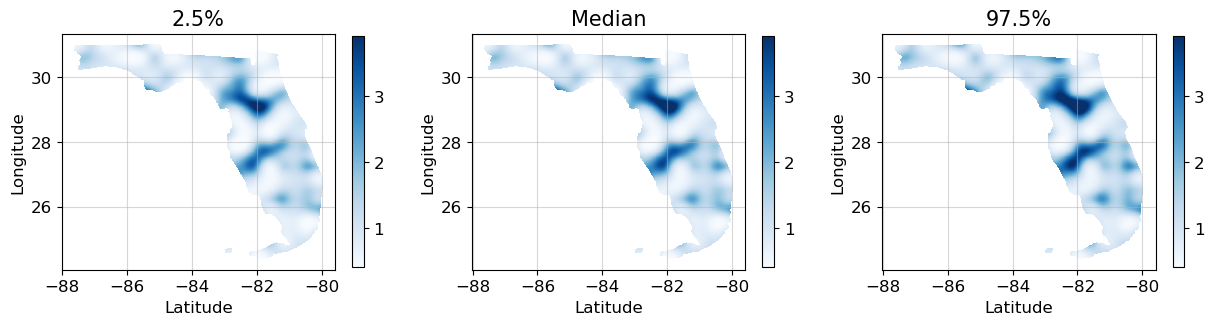

In [32]:
fig, axs = visualize_geo_regression(
    covariates_hat_df=quantile_regression_covariates_hat_df,
    posterior=posterior_pooled_quantile_regression_svi,
    parameter="spatial_component",
    parameter_transformer=lambda x: jnp.exp(x)
)
plt.show()

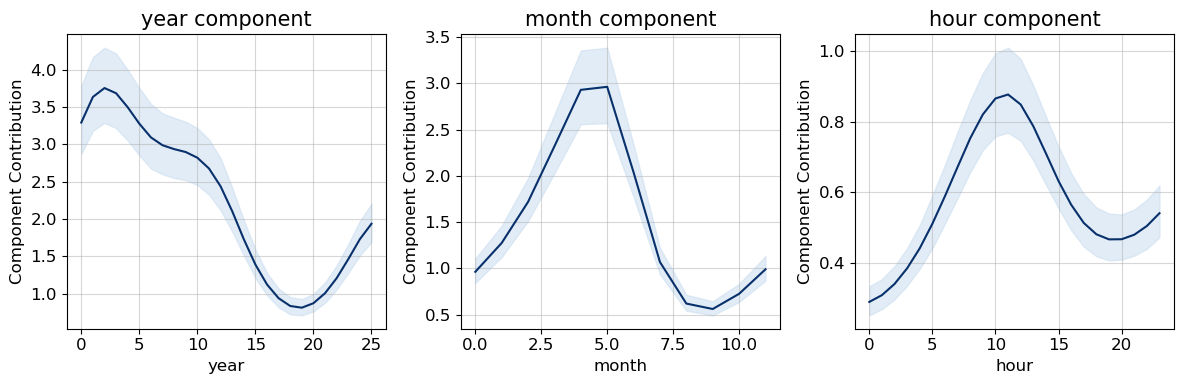

In [33]:
fig, axs = visualize_temporal_components(
    temporal_components=generate_temporal_components(
        posterior=posterior_pooled_quantile_regression_svi,
        transformers=quantile_regression_transformers,
        years=continuous_state_modelling_df[YEAR_COVARIATES].unique(),
        parameter_transformer=lambda x: jnp.exp(x)
    )
)
plt.show()

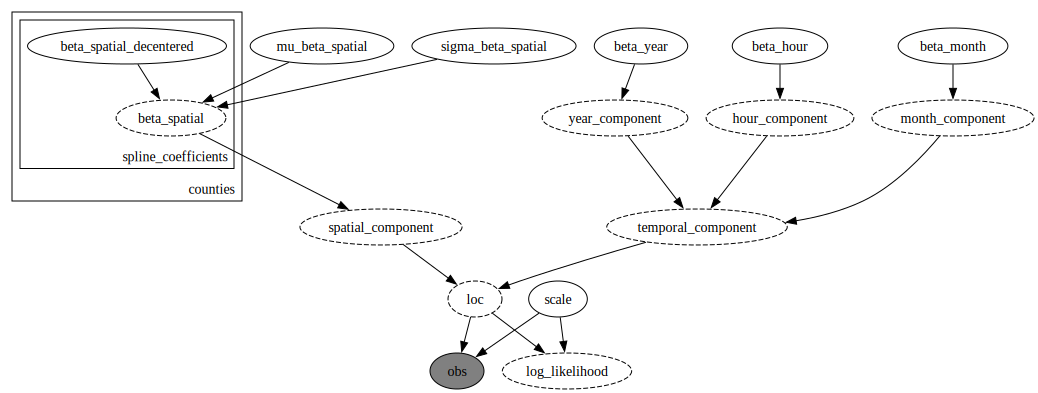

In [34]:
reparam_config = {
    "beta_spatial": LocScaleReparam(0),
}
@numpyro.handlers.reparam(config=reparam_config)
def hierarchical_quantile_regression(
    target: ArrayLike,
    covariates: Dict[str, ArrayLike],
    quantile: float,
    prior_mu_beta_spatial: Distribution,
    prior_sigma_beta_spatial: Distribution,
    prior_scale: Distribution,
    prior_beta_year: Distribution,
    prior_beta_month: Distribution,
    prior_beta_hour: Distribution,
) -> None:
    """Quantile regression model with partially pooled intercept"""
    n_groups = len(np.unique(covariates["counties_index"]))
    n_spatial_covariates = covariates["latitude_longitude_tensor_covariates"].shape[1]
    counties_index = covariates["counties_index"].flatten()

    mu_beta_spatial = numpyro.sample(
        "mu_beta_spatial",
        prior_mu_beta_spatial,
    )
    sigma_beta_spatial = numpyro.sample(
        "sigma_beta_spatial",
        prior_sigma_beta_spatial,
    )
    with numpyro.plate("counties", n_groups, dim=-2):

        with numpyro.plate("spline_coefficients", n_spatial_covariates, dim=-1):

            beta_spatial = numpyro.sample(
                "beta_spatial",
                Laplace(mu_beta_spatial, sigma_beta_spatial),
            )

    beta_hour = numpyro.sample(
        "beta_hour",
        prior_beta_hour.expand([covariates["hour_covariates"].shape[1]]),
    )
    beta_month = numpyro.sample(
        "beta_month",
        prior_beta_month.expand([covariates["month_covariates"].shape[1]]),
    )
    beta_year = numpyro.sample(
        "beta_year",
        prior_beta_year.expand([covariates["year_covariates"].shape[1]]),
    )
    spatial_component = numpyro.deterministic(
        name="spatial_component",
        value=jnp.sum(
            beta_spatial[counties_index, :] * covariates["latitude_longitude_tensor_covariates"],
            axis=1,
        ),
    )
    hour_component = numpyro.deterministic(
        name="hour_component",
        value=jnp.dot(covariates["hour_covariates"], beta_hour),
    )
    month_component = numpyro.deterministic(
        name="month_component",
        value=jnp.dot(covariates["month_covariates"], beta_month),
    )
    year_component = numpyro.deterministic(
        name="year_component",
        value=jnp.dot(covariates["year_covariates"], beta_year),
    )
    temporal_component = numpyro.deterministic(
        name="temporal_component",
        value=year_component + month_component + hour_component,
    )

    loc = numpyro.deterministic(
        name="loc",
        value=jnp.exp(spatial_component + temporal_component),
    )
    scale = numpyro.sample(
        "scale",
        prior_scale,
    )
    obs = numpyro.sample(
        "obs",
        AsymmetricLaplaceQuantile(loc=loc, scale=scale, quantile=quantile),
        obs=target,
    )
    if target is not None:
        numpyro.deterministic(
            "log_likelihood",
            AsymmetricLaplaceQuantile(
                loc=loc, 
                scale=scale, 
                quantile=quantile,
            )
            .log_prob(target)
        )

hierarchical_quantile_model_kwargs = {
    "covariates": quantile_regression_covariates,
    "quantile": CRITICAL_QUANTILE,
    "target": quantile_regression_target,
    "prior_mu_beta_spatial": Normal(loc=0.0, scale=5.0),
    "prior_sigma_beta_spatial": HalfCauchy(scale=2.0),
    "prior_beta_year": Normal(loc=0.0, scale=1),
    "prior_beta_month": Normal(loc=0.0, scale=1),
    "prior_beta_hour": Normal(loc=0.0, scale=1),
    "prior_scale": HalfNormal(scale=1),
}
hierarchical_quantile_model_parameters = [
    "mu_beta_latitude",
    "sigma_beta_latitude",
    "mu_beta_longitude",
    "sigma_beta_longitude",
    "beta_hour",
    "beta_month",
    "beta_year",
    "loc",
    "latitude_component",
    "longitude_component",
    "temporal_component",
    "spatial_component",
    "hour_component",
    "month_component",
    "year_component",
    "scale",
    "obs",
]
numpyro.render_model(
    hierarchical_quantile_regression,
    model_kwargs=hierarchical_quantile_model_kwargs,
    render_distributions=False,
)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:40,  2.42it/s]

  7%|▋         | 7/100 [00:00<00:05, 17.21it/s, init loss: 71826.6406, avg. loss [1-5]: 71922.1875]

 14%|█▍        | 14/100 [00:00<00:02, 30.19it/s, init loss: 71826.6406, avg. loss [6-10]: 71910.7891]

 21%|██        | 21/100 [00:00<00:02, 39.23it/s, init loss: 71826.6406, avg. loss [16-20]: 71963.5156]

 28%|██▊       | 28/100 [00:00<00:01, 45.85it/s, init loss: 71826.6406, avg. loss [21-25]: 71821.6719]

 35%|███▌      | 35/100 [00:00<00:01, 50.27it/s, init loss: 71826.6406, avg. loss [31-35]: 71905.7266]

 42%|████▏     | 42/100 [00:01<00:01, 53.57it/s, init loss: 71826.6406, avg. loss [36-40]: 71917.4219]

 49%|████▉     | 49/100 [00:01<00:00, 55.89it/s, init loss: 71826.6406, avg. loss [41-45]: 71900.5156]

 56%|█████▌    | 56/100 [00:01<00:00, 57.43it/s, init loss: 71826.6406, avg. loss [51-55]: 71542.4844]

 63%|██████▎   | 63/100 [00:01<00:00, 58.71it/s, init loss: 71826.6406, avg. loss [56-60]: 71994.7031]

 70%|███████   | 70/100 [00:01<00:00, 59.60it/s, init loss: 71826.6406, avg. loss [66-70]: 71393.4297]

 77%|███████▋  | 77/100 [00:01<00:00, 60.15it/s, init loss: 71826.6406, avg. loss [71-75]: 71649.0703]

 84%|████████▍ | 84/100 [00:01<00:00, 60.69it/s, init loss: 71826.6406, avg. loss [76-80]: 71787.6797]

 91%|█████████ | 91/100 [00:01<00:00, 60.97it/s, init loss: 71826.6406, avg. loss [86-90]: 71647.8906]

 98%|█████████▊| 98/100 [00:01<00:00, 61.16it/s, init loss: 71826.6406, avg. loss [91-95]: 71602.4609]

100%|██████████| 100/100 [00:02<00:00, 49.27it/s, init loss: 71826.6406, avg. loss [96-100]: 71488.1406]

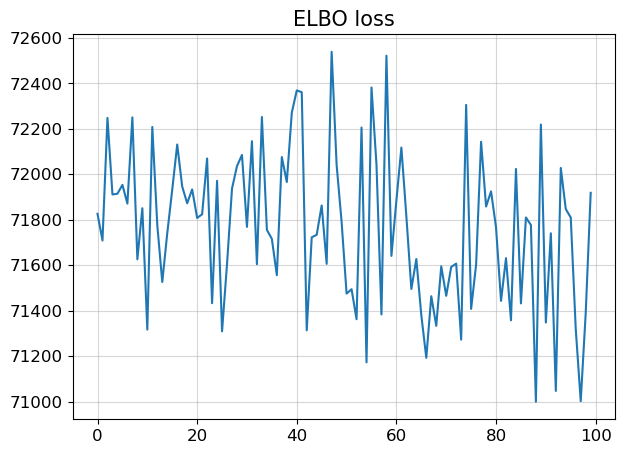

In [35]:
(
    svi_hierarchical_quantile_regression_parameters,
    svi_hierarchical_quantile_regression_guide,
) = sample_using_svi(
    rng_key=RNG_KEY,
    model=hierarchical_quantile_regression,
    model_kwargs=hierarchical_quantile_model_kwargs,
    autoguide=AutoLowRankMultivariateNormal,
    guide_kwargs={},
    optimizer_kwargs={"step_size": 1e-4, "clip_norm": 5},
    num_steps=NUMBER_ITERATIONS,
    num_particles=NUMBER_PARTICLES,
)

In [36]:
posterior_hierarchical_quantile_regression_svi = sample_posterior_predictive_svi(
    rng_key=RNG_KEY,
    covariates_hat=quantile_regression_covariates_hat,
    model_kwargs=hierarchical_quantile_model_kwargs,
    model=hierarchical_quantile_regression,
    guide=svi_hierarchical_quantile_regression_guide,
    svi_result=svi_hierarchical_quantile_regression_parameters,
    num_samples=2000,
    return_sites=hierarchical_quantile_model_parameters,
)

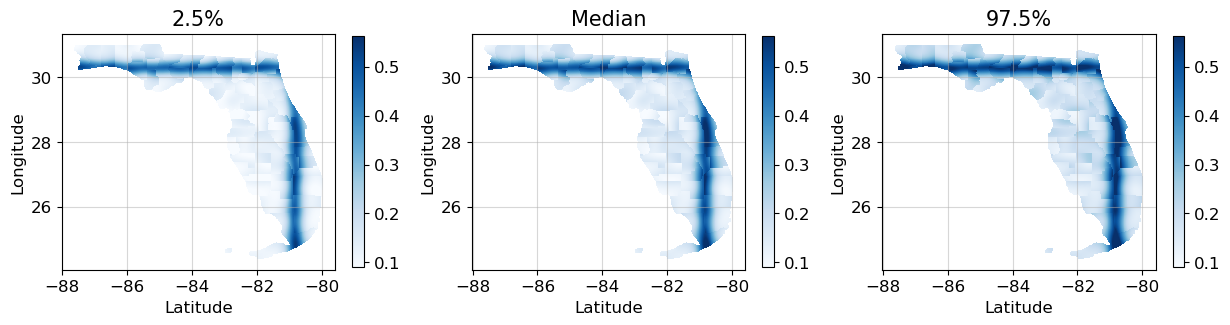

In [37]:
visualize_geo_regression(
    covariates_hat_df=quantile_regression_covariates_hat_df,
    posterior=posterior_hierarchical_quantile_regression_svi,
    parameter="spatial_component",
    parameter_transformer=lambda x: jnp.exp(x),
)
plt.show()

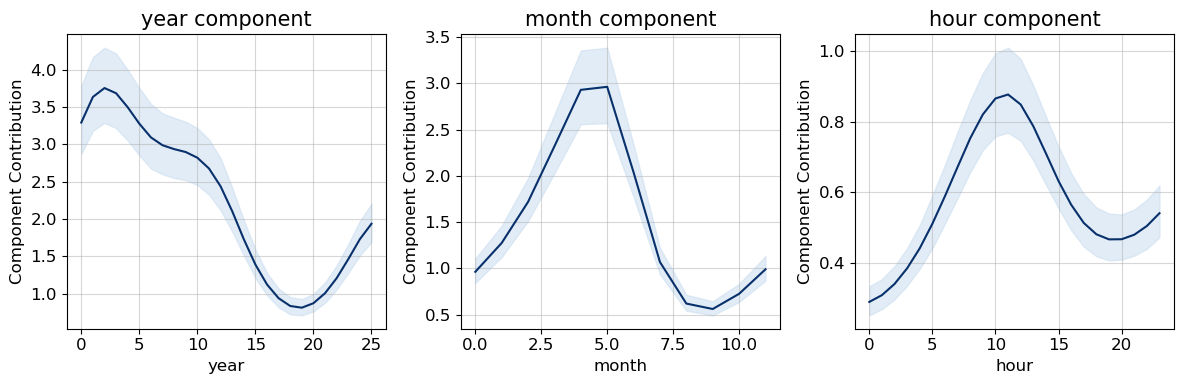

In [38]:
fig, axs = visualize_temporal_components(
    temporal_components=generate_temporal_components(
        posterior=posterior_pooled_quantile_regression_svi,
        transformers=quantile_regression_transformers,
        years=continuous_state_modelling_df[YEAR_COVARIATES].unique(),
        parameter_transformer=lambda x: jnp.exp(x),
    )
)
plt.show()

In [39]:
#| code-fold: true
#| code-summary: Show supplementary code
def create_estimation_covariates_zero_inflated_regression(
    quantile_regression_covariates_hat_df: pd.DataFrame,
    geometries_df: gpd.GeoDataFrame,
) -> Tuple[gpd.GeoDataFrame, Dict[str, ArrayLike]]:
    """Create the covariates for estimation"""
    zero_inflated_regression_covariates_df_hat = quantile_regression_covariates_hat_df[
        [YEAR_COVARIATES, MONTH_COVARIATE, HOUR_COVARIATE, COUNTIES_INDEX, STATE_INDEX]
    ].drop_duplicates()

    zero_inflated_regression_covariates_df_hat = gpd.GeoDataFrame(
        pd.merge(
            zero_inflated_regression_covariates_df_hat,
            geometries_df[[COUNTIES_INDEX, STATE_INDEX, "geometry"]],
            how="inner",
            on=[COUNTIES_INDEX, STATE_INDEX],
        )
    )
    zero_inflated_regression_covariates_hat = {
        "year_covariates": (
            zero_inflated_regression_covariates_df_hat[YEAR_COVARIATES].values.reshape(
                -1, 1
            )
        ),
        "month_covariates": (
            zero_inflated_regression_covariates_df_hat[MONTH_COVARIATE].values.reshape(
                -1, 1
            )
        ),
        "hour_covariates": (
            zero_inflated_regression_covariates_df_hat[HOUR_COVARIATE].values.reshape(
                -1, 1
            )
        ),
        "counties_index": (
            zero_inflated_regression_covariates_df_hat[COUNTIES_INDEX].values.reshape(
                -1, 1
            )
        ),
    }
    return (
        zero_inflated_regression_covariates_df_hat,
        zero_inflated_regression_covariates_hat,
    )
zero_inflated_regression_transformers = {
    "year_covariates": Pipeline(
        steps=[
            (
                "ordinal_encoder",
                OrdinalEncoder(
                    dtype="int",
                ),
            ),
            (
                "spline_transformer",
                SplineTransformer(
                    include_bias=False,
                ),
            ),
        ]
    ),
    "month_covariates": Pipeline(
        steps=[
            (
                "spline_transformer",
                SplineTransformer(
                    include_bias=False,
                ),
            )
        ]
    ),
    "hour_covariates": Pipeline(
        steps=[
            (
                "spline_transformer",
                SplineTransformer(
                    include_bias=False,
                ),
            )
        ]
    ),
    "counties_index": OrdinalEncoder(
        dtype="int",
    ),
}

zero_inflated_regression_covariates = {
    "year_covariates": (
        count_state_modelling_df[YEAR_COVARIATES].values.reshape(-1, 1)
    ),
    "month_covariates": (
        count_state_modelling_df[MONTH_COVARIATE].values.reshape(-1, 1)
    ),
    "hour_covariates": (count_state_modelling_df[HOUR_COVARIATE].values.reshape(-1, 1)),
    "counties_index": (count_state_modelling_df[COUNTIES_INDEX].values.reshape(-1, 1)),
}
zero_inflated_regression_covariates_hat_df, zero_inflated_regression_covariates_hat = (
    create_estimation_covariates_zero_inflated_regression(
        quantile_regression_covariates_hat_df=quantile_regression_covariates_hat_df,
        geometries_df=geometries_df,
    )
)

(
    zero_inflated_regression_covariates,
    zero_inflated_regression_transformers,
) = transform_fitting_covariates(
    covariates=zero_inflated_regression_covariates,
    transformers=zero_inflated_regression_transformers,
)
zero_inflated_regression_covariates_hat = transform_estimation_covariates(
    covariates=zero_inflated_regression_covariates_hat,
    transformers=zero_inflated_regression_transformers,
)
zero_inflated_regression_target = count_state_modelling_df[COUNT_TARGET].values

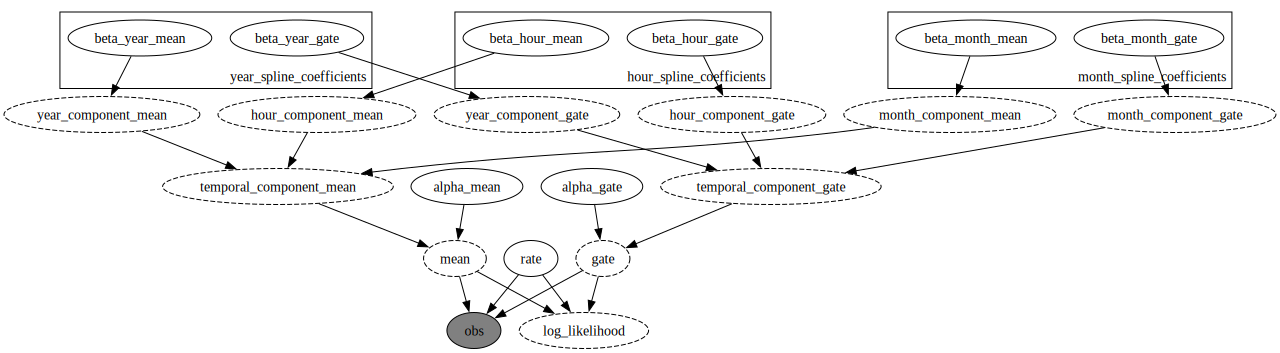

In [40]:
from jax.scipy.special import expit
from jax import numpy as jnp

from numpyro.distributions import (
    NegativeBinomial2,
    InverseGamma,
    ZeroInflatedDistribution,
)


def pooled_zero_inflated_negative_binomial_regression(
    target: ArrayLike,
    covariates: Dict[str, ArrayLike],
    prior_rate: Distribution,
    prior_alpha_gate: Distribution,
    prior_beta_year_gate: Distribution,
    prior_beta_month_gate: Distribution,
    prior_beta_hour_gate: Distribution,
    prior_alpha_mean: Distribution,
    prior_beta_year_mean: Distribution,
    prior_beta_month_mean: Distribution,
    prior_beta_hour_mean: Distribution,
) -> None:
    """Simple zero-inflated negative binomial regression model"""
    alpha_gate = numpyro.sample(
        "alpha_gate",
        prior_alpha_gate,
    )
    alpha_mean = numpyro.sample(
        "alpha_mean",
        prior_alpha_mean,
    )

    with numpyro.plate(
        "year_spline_coefficients", size=covariates["year_covariates"].shape[1]
    ):
        beta_year_gate = numpyro.sample(
            "beta_year_gate",
            prior_beta_year_gate,
        )
        beta_year_mean = numpyro.sample(
            "beta_year_mean",
            prior_beta_year_mean,
        )

    with numpyro.plate(
        "hour_spline_coefficients", size=covariates["hour_covariates"].shape[1]
    ):
        beta_hour_gate = numpyro.sample(
            "beta_hour_gate",
            prior_beta_hour_gate,
        )
        beta_hour_mean = numpyro.sample(
            "beta_hour_mean",
            prior_beta_hour_mean,
        )

    with numpyro.plate(
        "month_spline_coefficients", size=covariates["month_covariates"].shape[1]
    ):
        beta_month_gate = numpyro.sample(
            "beta_month_gate",
            prior_beta_month_gate,
        )
        beta_month_mean = numpyro.sample(
            "beta_month_mean",
            prior_beta_month_mean,
        )

    # Year component
    year_component_gate = numpyro.deterministic(
        name="year_component_gate",
        value=jnp.dot(covariates["year_covariates"], beta_year_gate),
    )
    year_component_mean = numpyro.deterministic(
        name="year_component_mean",
        value=jnp.dot(covariates["year_covariates"], beta_year_mean),
    )
    # Month component
    month_component_gate = numpyro.deterministic(
        name="month_component_gate",
        value=jnp.dot(covariates["month_covariates"], beta_month_gate),
    )
    month_component_mean = numpyro.deterministic(
        name="month_component_mean",
        value=jnp.dot(covariates["month_covariates"], beta_month_mean),
    )
    # Hour component
    hour_component_gate = numpyro.deterministic(
        name="hour_component_gate",
        value=jnp.dot(covariates["hour_covariates"], beta_hour_gate),
    )
    hour_component_mean = numpyro.deterministic(
        name="hour_component_mean",
        value=jnp.dot(covariates["hour_covariates"], beta_hour_mean),
    )

    # Temporal components
    temporal_component_gate = numpyro.deterministic(
        name="temporal_component_gate",
        value=year_component_gate + month_component_gate + hour_component_gate,
    )
    temporal_component_mean = numpyro.deterministic(
        name="temporal_component_mean",
        value=year_component_mean + month_component_mean + hour_component_mean,
    )

    gate = numpyro.deterministic(
        name="gate",
        value=1 - expit(alpha_gate + temporal_component_gate),
    )
    mean = numpyro.deterministic(
        name="mean",
        value=jnp.exp(alpha_mean + temporal_component_mean),
    )
    rate = numpyro.sample(
        "rate",
        prior_rate,
    )

    obs = numpyro.sample(
        "obs",
        ZeroInflatedDistribution(
            base_dist=NegativeBinomial2(mean, rate),
            gate=gate,
        ),
        obs=target,
    )
    if target is not None:
        numpyro.deterministic(
            "log_likelihood",
            ZeroInflatedDistribution(
                base_dist=NegativeBinomial2(mean, rate),
                gate=gate,
            )
            .log_prob(target)
        )

pooled_zero_inflated_regression_parameters = [
    "rate",
    "alpha_gate",
    "beta_year_gate",
    "beta_month_gate",
    "beta_hour_gate",
    "alpha_mean",
    "beta_year_mean",
    "beta_month_mean",
    "beta_hour_mean",
    "gate",
    "mean",
    "obs",
]
pooled_zero_inflated_regression_kwargs = {
    "covariates": zero_inflated_regression_covariates,
    "target": zero_inflated_regression_target,
    "prior_rate": InverseGamma(0.4, 0.3),
    "prior_alpha_gate": Normal(loc=0.0, scale=1.),
    "prior_beta_year_gate": Normal(loc=0.0, scale=1.),
    "prior_beta_month_gate": Normal(loc=0.0, scale=1.),
    "prior_beta_hour_gate": Normal(loc=0.0, scale=1.),
    "prior_alpha_mean": Normal(loc=0.0, scale=1.),
    "prior_beta_year_mean": Normal(loc=0.0, scale=1.),
    "prior_beta_month_mean": Normal(loc=0.0, scale=1.),
    "prior_beta_hour_mean": Normal(loc=0.0, scale=1.),
}
numpyro.render_model(
    pooled_zero_inflated_negative_binomial_regression,
    model_kwargs=pooled_zero_inflated_regression_kwargs,
    render_distributions=False,
)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<01:08,  1.45it/s]

 10%|█         | 10/100 [00:00<00:05, 16.40it/s, init loss: 26211.6211, avg. loss [6-10]: 26363.3594]

 20%|██        | 20/100 [00:00<00:02, 32.13it/s, init loss: 26211.6211, avg. loss [16-20]: 26311.1816]

 30%|███       | 30/100 [00:01<00:01, 45.70it/s, init loss: 26211.6211, avg. loss [26-30]: 27444.9961]

 40%|████      | 40/100 [00:01<00:01, 57.00it/s, init loss: 26211.6211, avg. loss [36-40]: 27344.7129]

 50%|█████     | 50/100 [00:01<00:00, 65.83it/s, init loss: 26211.6211, avg. loss [46-50]: 27010.3789]

 60%|██████    | 60/100 [00:01<00:00, 72.68it/s, init loss: 26211.6211, avg. loss [56-60]: 26880.2246]

 70%|███████   | 70/100 [00:01<00:00, 77.86it/s, init loss: 26211.6211, avg. loss [66-70]: 27138.0352]

 80%|████████  | 80/100 [00:01<00:00, 81.87it/s, init loss: 26211.6211, avg. loss [76-80]: 26617.7383]

 90%|█████████ | 90/100 [00:01<00:00, 84.24it/s, init loss: 26211.6211, avg. loss [86-90]: 26915.8555]

 99%|█████████▉| 99/100 [00:01<00:00, 85.46it/s, init loss: 26211.6211, avg. loss [91-95]: 26201.1523]

100%|██████████| 100/100 [00:01<00:00, 55.88it/s, init loss: 26211.6211, avg. loss [96-100]: 27439.7871]

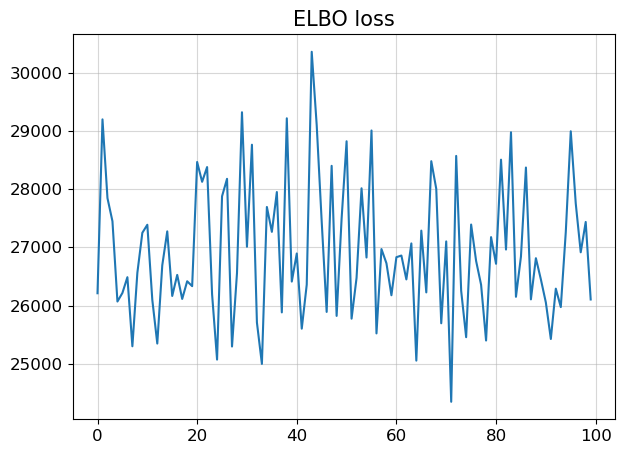

In [41]:
(
    svi_pooled_zero_inflated_regression_parameters,
    svi_pooled_zero_inflated_regression_guide,
) = sample_using_svi(
    rng_key=RNG_KEY,
    model=pooled_zero_inflated_negative_binomial_regression,
    model_kwargs=pooled_zero_inflated_regression_kwargs,
    autoguide=AutoLowRankMultivariateNormal,
    guide_kwargs={},
    optimizer_kwargs={"step_size": 1e-4, "clip_norm": 5},
    num_steps=NUMBER_ITERATIONS,
    num_particles=NUMBER_PARTICLES,
)

In [42]:
posterior_pooled_zero_inflated_regression_svi = sample_posterior_predictive_svi(
    rng_key=RNG_KEY,
    model=pooled_zero_inflated_negative_binomial_regression,
    guide=svi_pooled_zero_inflated_regression_guide,
    covariates_hat=zero_inflated_regression_covariates_hat,
    svi_result=svi_pooled_zero_inflated_regression_parameters,
    num_samples=1500,
    model_kwargs=pooled_zero_inflated_regression_kwargs,
    return_sites=pooled_zero_inflated_regression_parameters,
)

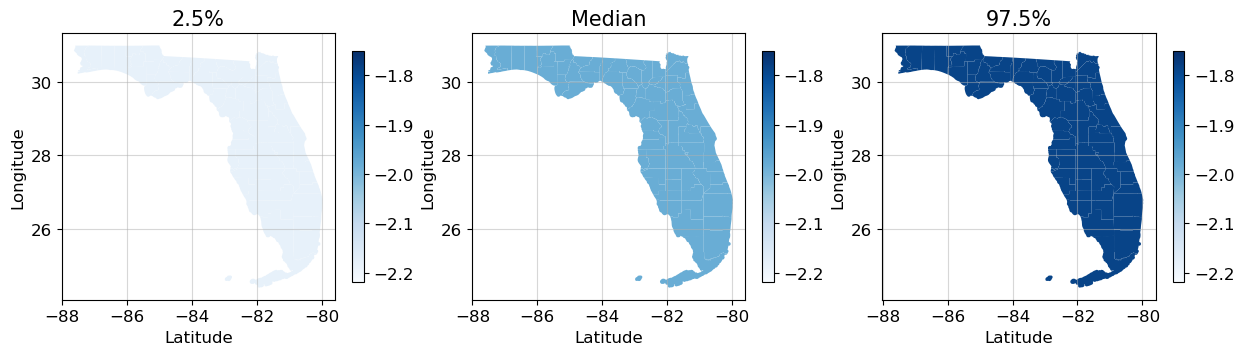

In [43]:
visualize_geo_regression(
    covariates_hat_df=zero_inflated_regression_covariates_hat_df,
    posterior=posterior_pooled_zero_inflated_regression_svi,
    parameter="alpha_gate",
)
plt.show()

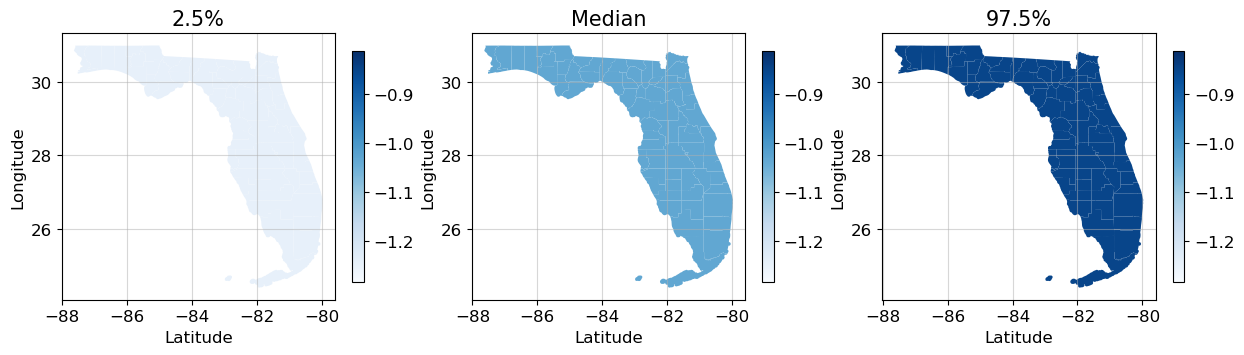

In [44]:
visualize_geo_regression(
    covariates_hat_df=zero_inflated_regression_covariates_hat_df,
    posterior=posterior_pooled_zero_inflated_regression_svi,
    parameter="alpha_mean",
)
plt.show()

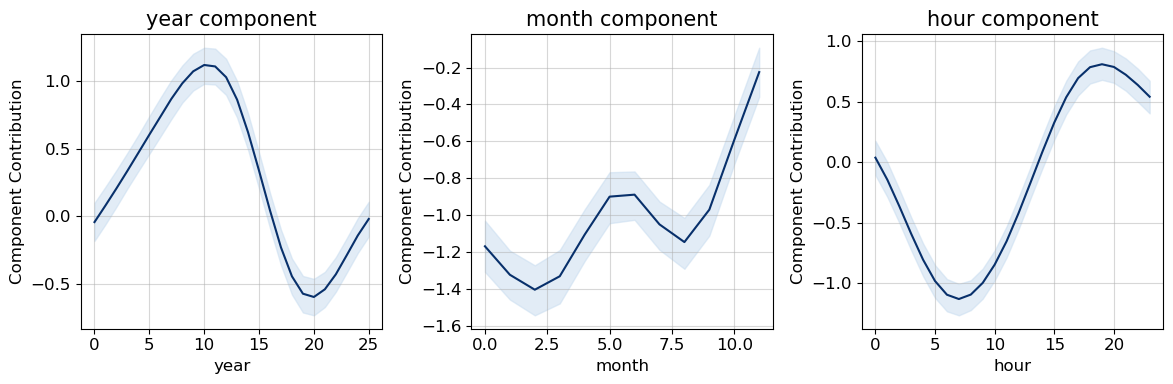

In [45]:
fig, axs = visualize_temporal_components(
    temporal_components=generate_temporal_components(
        posterior=posterior_pooled_zero_inflated_regression_svi,
        transformers=zero_inflated_regression_transformers,
        years=count_state_modelling_df[YEAR_COVARIATES].unique(),
        suffix="_gate",
    )
)
plt.show()

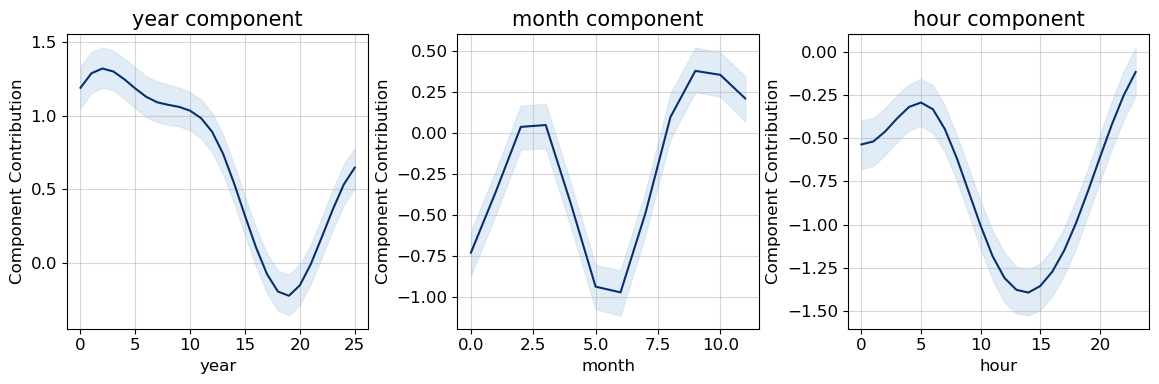

In [46]:
fig, axs = visualize_temporal_components(
    temporal_components=generate_temporal_components(
        posterior=posterior_pooled_zero_inflated_regression_svi,
        transformers=zero_inflated_regression_transformers,
        years=count_state_modelling_df[YEAR_COVARIATES].unique(),
        suffix="_mean",
    )
)
plt.show()

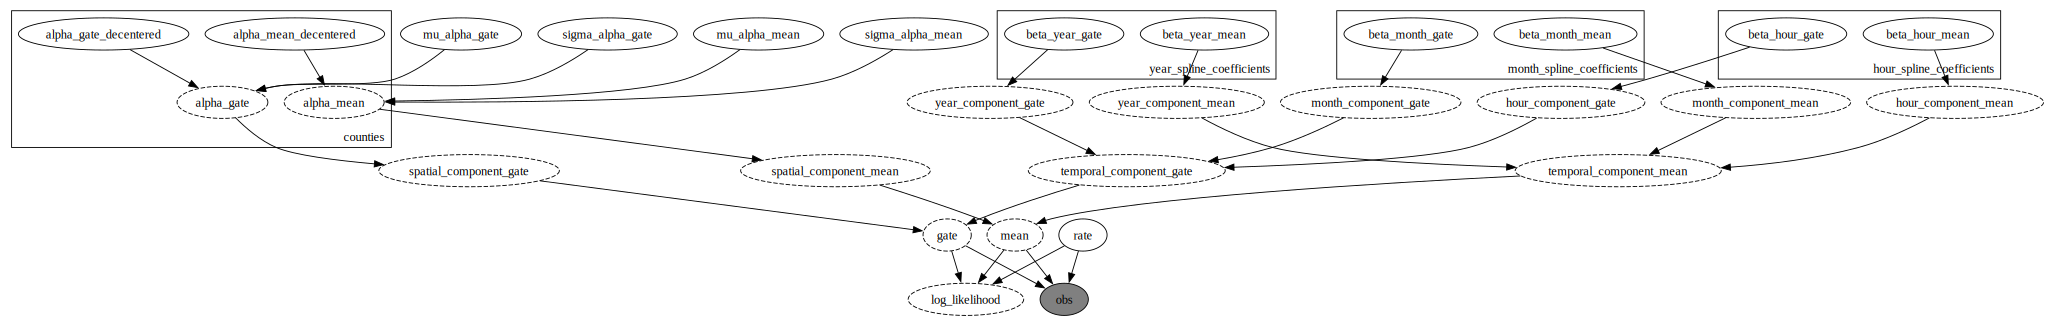

In [47]:
reparam_config = {"alpha_gate": LocScaleReparam(0), "alpha_mean": LocScaleReparam(0)}


@numpyro.handlers.reparam(config=reparam_config)
def hierarchical_zero_inflated_negative_binomial_regression(
    target: ArrayLike,
    covariates: Dict[str, ArrayLike],
    prior_rate: Distribution,
    prior_beta_year_gate: Distribution,
    prior_beta_month_gate: Distribution,
    prior_beta_hour_gate: Distribution,
    prior_beta_year_mean: Distribution,
    prior_beta_month_mean: Distribution,
    prior_beta_hour_mean: Distribution,
    prior_mu_alpha_gate: Distribution,
    prior_sigma_alpha_gate: Distribution,
    prior_mu_alpha_mean: Distribution,
    prior_sigma_alpha_mean: Distribution,
) -> None:
    """Hierarchical zero-inflated Negative Binomial regression model"""
    number_groups = len(np.unique(covariates["counties_index"]))
    counties_index = covariates["counties_index"].flatten()

    mu_alpha_gate = numpyro.sample(
        "mu_alpha_gate",
        prior_mu_alpha_gate,
    )
    sigma_alpha_gate = numpyro.sample(
        "sigma_alpha_gate",
        prior_sigma_alpha_gate,
    )
    mu_alpha_mean = numpyro.sample(
        "mu_alpha_mean",
        prior_mu_alpha_mean,
    )
    sigma_alpha_mean = numpyro.sample(
        "sigma_alpha_mean",
        prior_sigma_alpha_mean,
    )

    with numpyro.plate("counties", size=number_groups):

        alpha_gate = numpyro.sample(
            "alpha_gate",
            Normal(mu_alpha_gate, sigma_alpha_gate),
        )
        alpha_mean = numpyro.sample(
            "alpha_mean",
            Normal(mu_alpha_mean, sigma_alpha_mean),
        )

    with numpyro.plate(
        "year_spline_coefficients", size=covariates["year_covariates"].shape[1]
    ):
        beta_year_gate = numpyro.sample(
            "beta_year_gate",
            prior_beta_year_gate,
        )
        beta_year_mean = numpyro.sample(
            "beta_year_mean",
            prior_beta_year_mean,
        )

    with numpyro.plate(
        "hour_spline_coefficients", size=covariates["hour_covariates"].shape[1]
    ):
        beta_hour_gate = numpyro.sample(
            "beta_hour_gate",
            prior_beta_hour_gate,
        )
        beta_hour_mean = numpyro.sample(
            "beta_hour_mean",
            prior_beta_hour_mean,
        )

    with numpyro.plate(
        "month_spline_coefficients", size=covariates["month_covariates"].shape[1]
    ):
        beta_month_gate = numpyro.sample(
            "beta_month_gate",
            prior_beta_month_gate,
        )
        beta_month_mean = numpyro.sample(
            "beta_month_mean",
            prior_beta_month_mean,
        )

    # Year component
    year_component_gate = numpyro.deterministic(
        name="year_component_gate",
        value=jnp.dot(covariates["year_covariates"], beta_year_gate),
    )
    year_component_mean = numpyro.deterministic(
        name="year_component_mean",
        value=jnp.dot(covariates["year_covariates"], beta_year_mean),
    )
    # Month component
    month_component_gate = numpyro.deterministic(
        name="month_component_gate",
        value=jnp.dot(covariates["month_covariates"], beta_month_gate),
    )
    month_component_mean = numpyro.deterministic(
        name="month_component_mean",
        value=jnp.dot(covariates["month_covariates"], beta_month_mean),
    )
    # Hour component
    hour_component_gate = numpyro.deterministic(
        name="hour_component_gate",
        value=jnp.dot(covariates["hour_covariates"], beta_hour_gate),
    )
    hour_component_mean = numpyro.deterministic(
        name="hour_component_mean",
        value=jnp.dot(covariates["hour_covariates"], beta_hour_mean),
    )

    # Temporal components
    temporal_component_gate = numpyro.deterministic(
        name="temporal_component_gate",
        value=year_component_gate + month_component_gate + hour_component_gate,
    )
    temporal_component_mean = numpyro.deterministic(
        name="temporal_component_mean",
        value=year_component_mean + month_component_mean + hour_component_mean,
    )

    spatial_component_mean = numpyro.deterministic(
        name="spatial_component_mean",
        value=alpha_mean[counties_index],
    )

    spatial_component_gate = numpyro.deterministic(
        name="spatial_component_gate",
        value=alpha_gate[counties_index],
    )

    gate = numpyro.deterministic(
        name="gate",
        value=1 - expit(spatial_component_gate + temporal_component_gate),
    )
    mean = numpyro.deterministic(
        name="mean",
        value=jnp.exp(spatial_component_mean + temporal_component_mean),
    )
    rate = numpyro.sample(
        "rate",
        prior_rate,
    )

    obs = numpyro.sample(
        "obs",
        ZeroInflatedDistribution(
            base_dist=NegativeBinomial2(mean, rate),
            gate=gate,
        ),
        obs=target,
    )

    if target is not None:
        numpyro.deterministic(
            "log_likelihood",
            ZeroInflatedDistribution(
                base_dist=NegativeBinomial2(mean, rate),
                gate=gate,
            )
            .log_prob(target)
        )

hierarchical_zero_inflated_regression_parameters = [
    "rate",
    "mean",
    "gate",
    "mu_alpha_gate",
    "sigma_alpha_gate",
    "mu_alpha_mean",
    "sigma_alpha_mean",
    "alpha_gate",
    "spatial_component_mean",
    "spatial_component_gate",
    "alpha_mean",
    "beta_year_mean",
    "beta_month_mean",
    "beta_hour_mean",
    "beta_year_gate",
    "beta_month_gate",
    "beta_hour_gate",
    "obs",
]
hierarchical_zero_inflated_regression_kwargs = {
    "covariates": zero_inflated_regression_covariates,
    "target": zero_inflated_regression_target,
    "prior_rate": InverseGamma(0.4, 0.3),
    "prior_mu_alpha_gate": Normal(loc=0.0, scale=1),
    "prior_sigma_alpha_gate": HalfCauchy(5),
    "prior_mu_alpha_mean": Normal(loc=0.0, scale=1),
    "prior_sigma_alpha_mean": HalfCauchy(5),
    "prior_beta_year_gate": Normal(loc=0.0, scale=1),
    "prior_beta_month_gate": Normal(loc=0.0, scale=1),
    "prior_beta_hour_gate": Normal(loc=0.0, scale=1),
    "prior_beta_year_mean": Normal(loc=0.0, scale=1),
    "prior_beta_month_mean": Normal(loc=0.0, scale=1),
    "prior_beta_hour_mean": Normal(loc=0.0, scale=1),
}
numpyro.render_model(
    hierarchical_zero_inflated_negative_binomial_regression,
    model_kwargs=hierarchical_zero_inflated_regression_kwargs,
    render_distributions=False,
)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<01:18,  1.27it/s]

  9%|▉         | 9/100 [00:00<00:06, 13.31it/s, init loss: 35326.1836, avg. loss [1-5]: 39163.5781]

 18%|█▊        | 18/100 [00:00<00:03, 26.89it/s, init loss: 35326.1836, avg. loss [11-15]: 39138.2695]

 27%|██▋       | 27/100 [00:01<00:01, 39.43it/s, init loss: 35326.1836, avg. loss [21-25]: 36557.6445]

 36%|███▌      | 36/100 [00:01<00:01, 50.22it/s, init loss: 35326.1836, avg. loss [31-35]: 37389.9453]

 45%|████▌     | 45/100 [00:01<00:00, 59.31it/s, init loss: 35326.1836, avg. loss [41-45]: 38235.6836]

 54%|█████▍    | 54/100 [00:01<00:00, 66.32it/s, init loss: 35326.1836, avg. loss [46-50]: 36664.7383]

 63%|██████▎   | 63/100 [00:01<00:00, 71.98it/s, init loss: 35326.1836, avg. loss [56-60]: 36305.8047]

 72%|███████▏  | 72/100 [00:01<00:00, 76.32it/s, init loss: 35326.1836, avg. loss [66-70]: 38509.9609]

 81%|████████  | 81/100 [00:01<00:00, 79.57it/s, init loss: 35326.1836, avg. loss [76-80]: 35461.6250]

 90%|█████████ | 90/100 [00:01<00:00, 81.88it/s, init loss: 35326.1836, avg. loss [86-90]: 38346.7344]

 99%|█████████▉| 99/100 [00:01<00:00, 83.04it/s, init loss: 35326.1836, avg. loss [91-95]: 36974.0664]

100%|██████████| 100/100 [00:01<00:00, 51.59it/s, init loss: 35326.1836, avg. loss [96-100]: 37281.2969]

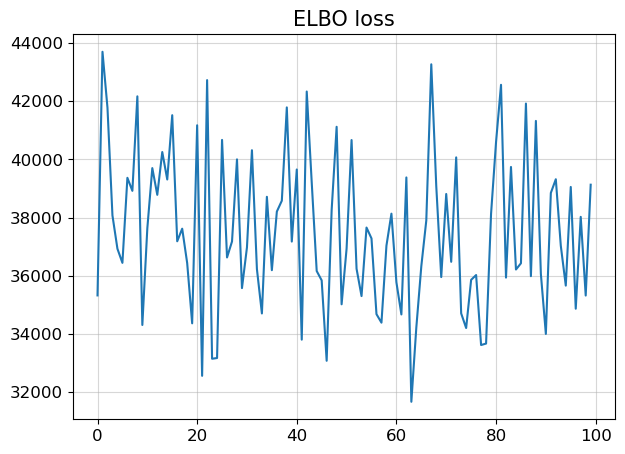

In [48]:
(
    svi_hierarchical_zero_inflated_regression_parameters,
    svi_hierarchical_zero_inflated_regression_guide,
) = sample_using_svi(
    rng_key=RNG_KEY,
    model=hierarchical_zero_inflated_negative_binomial_regression,
    model_kwargs=hierarchical_zero_inflated_regression_kwargs,
    autoguide=AutoLowRankMultivariateNormal,
    guide_kwargs={},
    optimizer_kwargs={"step_size": 1e-4, "clip_norm": 5},
    num_steps=NUMBER_ITERATIONS,
    num_particles=NUMBER_PARTICLES,
)

In [49]:
posterior_hierarchical_zero_inflated_regression_svi = sample_posterior_predictive_svi(
    rng_key=RNG_KEY,
    model=hierarchical_zero_inflated_negative_binomial_regression,
    guide=svi_hierarchical_zero_inflated_regression_guide,
    covariates_hat=zero_inflated_regression_covariates_hat,
    svi_result=svi_hierarchical_zero_inflated_regression_parameters,
    num_samples=2000,
    model_kwargs=hierarchical_zero_inflated_regression_kwargs,
    return_sites=hierarchical_zero_inflated_regression_parameters,
)

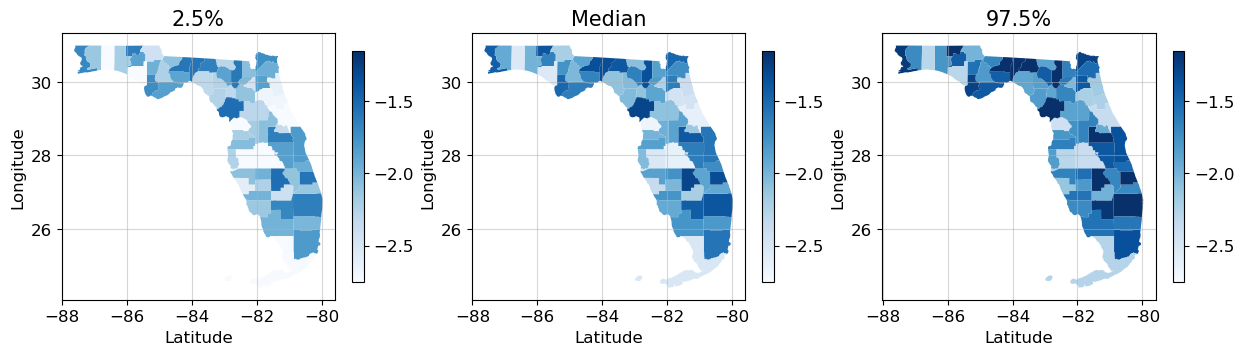

In [50]:
visualize_geo_regression(
    covariates_hat_df=zero_inflated_regression_covariates_hat_df,
    posterior=posterior_hierarchical_zero_inflated_regression_svi,
    parameter="spatial_component_gate",
)
plt.show()

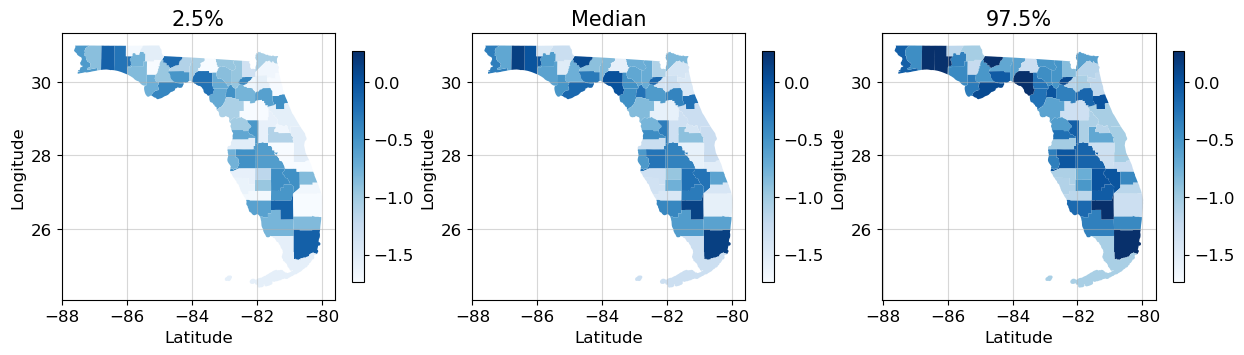

In [51]:
visualize_geo_regression(
    covariates_hat_df=zero_inflated_regression_covariates_hat_df,
    posterior=posterior_hierarchical_zero_inflated_regression_svi,
    parameter="spatial_component_mean",
)
plt.show()

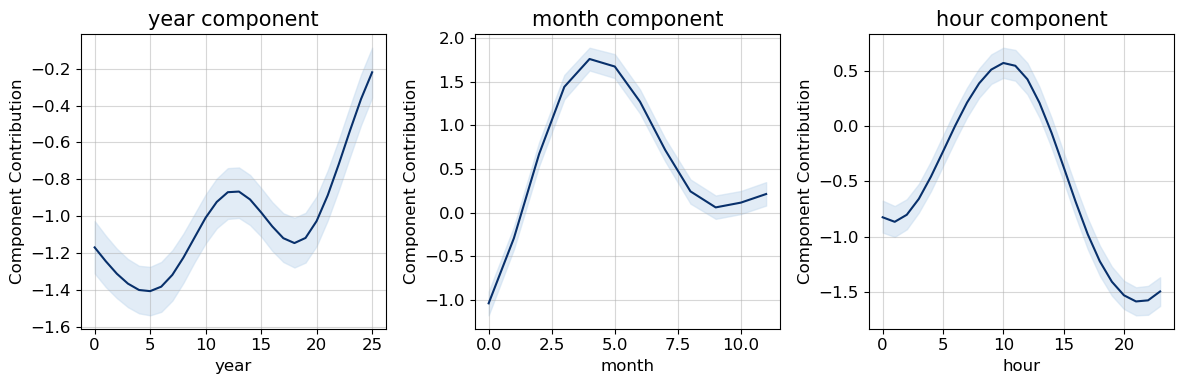

In [52]:
fig, axs = visualize_temporal_components(
    temporal_components=generate_temporal_components(
        posterior=posterior_hierarchical_zero_inflated_regression_svi,
        transformers=zero_inflated_regression_transformers,
        years=count_state_modelling_df[YEAR_COVARIATES].unique(),
        suffix="_gate",
    )
)
plt.show()

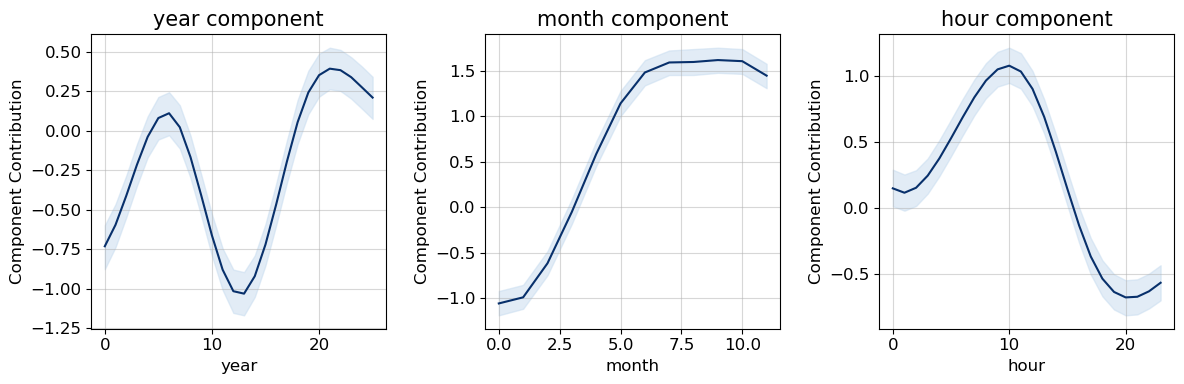

In [53]:
fig, axs = visualize_temporal_components(
    temporal_components=generate_temporal_components(
        posterior=posterior_hierarchical_zero_inflated_regression_svi,
        transformers=zero_inflated_regression_transformers,
        years=count_state_modelling_df[YEAR_COVARIATES].unique(),
        suffix="_mean",
    )
)
plt.show()